In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

#!pip install imblearn

In [2]:
df = pd.read_excel('Company_Data2015.xlsx')
df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital Employed                     3586 non-null   float64
 6   Total Debt                           3586 non-null   float64
 7   Gross Block                          3586 non-null   float64
 8   Net Working Capital                  3586 non-null   float64
 9   Current Assets                       3586 non-null   float64
 10  Current Liabilities and Provisions   3586 non-null   float64
 11  Total Assets/Liabilities      

In [4]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and').str.replace('[', '_').str.replace(']', '').str.replace('-', '_').str.replace('.', '')


In [5]:
df.columns

Index(['Co_Code', 'Co_Name', 'Networth_Next_Year', 'Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block',
       'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_by_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj_Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
      

In [6]:
df.shape

(3586, 67)

In [7]:
df.drop('Co_Code', axis = 1, inplace = True)


In [8]:
df.shape

(3586, 66)

In [9]:
df.drop('Co_Name', axis = 1, inplace = True)


In [10]:
df.head()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_by_Liabilities,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
0,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [11]:

missing_value = df.isnull().sum()
for key,value in missing_value.iteritems():
    if value > 0:
        print(key,":",value)

Book_Value_Adj_Unit_Curr : 4
Current_Ratio_Latest : 1
Fixed_Assets_Ratio_Latest : 1
Inventory_Ratio_Latest : 1
Debtors_Ratio_Latest : 1
Total_Asset_Turnover_Ratio_Latest : 1
Interest_Cover_Ratio_Latest : 1
PBIDTM_perc_Latest : 1
PBITM_perc_Latest : 1
PBDTM_perc_Latest : 1
CPM_perc_Latest : 1
APATM_perc_Latest : 1
Inventory_Velocity_Days : 103


In [12]:
print("The number of duplicate rows are",df.duplicated().sum())


The number of duplicate rows are 0


In [13]:
df=df.dropna()

In [14]:
df.shape

(3478, 65)

In [15]:
df.describe()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_by_Liabilities,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
count,3478.00000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,...,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3.478000e+03,3478.000000,3478.000000,3478.000000
mean,695.16477,63.483120,625.787645,2552.795152,1781.765822,599.449034,409.407892,1772.834747,387.062099,1754.783706,...,-46.802619,-105.536176,-313.524991,-308.709779,-367.443358,617.107821,2.088570e+03,79.632260,0.825127,63.114267
std,4591.16733,790.545496,3944.010943,24282.048921,21452.740398,4937.520124,6375.614458,20792.208134,2648.061963,11440.342981,...,1807.404600,3094.191672,11085.468405,10836.215161,12687.778624,10799.756889,5.498550e+04,137.879978,1.192036,991.663584
min,-8021.60000,0.000000,-7027.480000,-1824.750000,-0.720000,-41.190000,-13162.420000,-0.910000,-0.230000,-4.510000,...,-78870.450000,-141600.000000,-590500.000000,-572000.000000,-688600.000000,0.000000,0.000000e+00,-199.000000,-0.330000,-61.000000
25%,3.92250,3.732500,3.850000,7.602500,0.040000,0.610000,1.000000,4.062500,0.762500,10.585000,...,0.152500,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000e+00,0.000000,0.070000,0.280000
50%,18.73000,8.190000,18.305000,38.430000,7.710000,15.985000,10.275000,24.615000,9.225000,51.590000,...,8.055000,5.230000,4.670000,3.885000,1.585000,49.500000,3.900000e+01,35.000000,0.495000,1.530000
75%,121.10000,19.232500,114.032500,223.020000,73.087500,132.650000,61.150000,135.277500,65.765000,305.752500,...,18.597500,14.087500,13.840000,11.237500,7.187500,106.000000,9.000000e+01,96.000000,1.170000,4.857500
max,111729.10000,42263.460000,81657.350000,714001.250000,652823.810000,128477.590000,223257.560000,721166.000000,83232.980000,254737.220000,...,19233.330000,19195.700000,15640.000000,15640.000000,15266.670000,514721.000000,2.034145e+06,996.000000,17.630000,43404.000000


In [16]:
pd.DataFrame(df.skew().sort_values(ascending=False),columns=['Skewness'])

,Skewness
Book_Value_Adj_Unit_Curr,58.969950
ROG_PBIT_perc,58.071743
ROG_PBIDT_perc,58.025042
ROG_PBDT_perc,57.533404
ROG_Market_Capitalisation_perc,56.480055
...,...
PBIDTM_perc_Latest,-31.156579
PBITM_perc_Latest,-35.789752
CPM_perc_Latest,-46.342422
PBDTM_perc_Latest,-47.068925


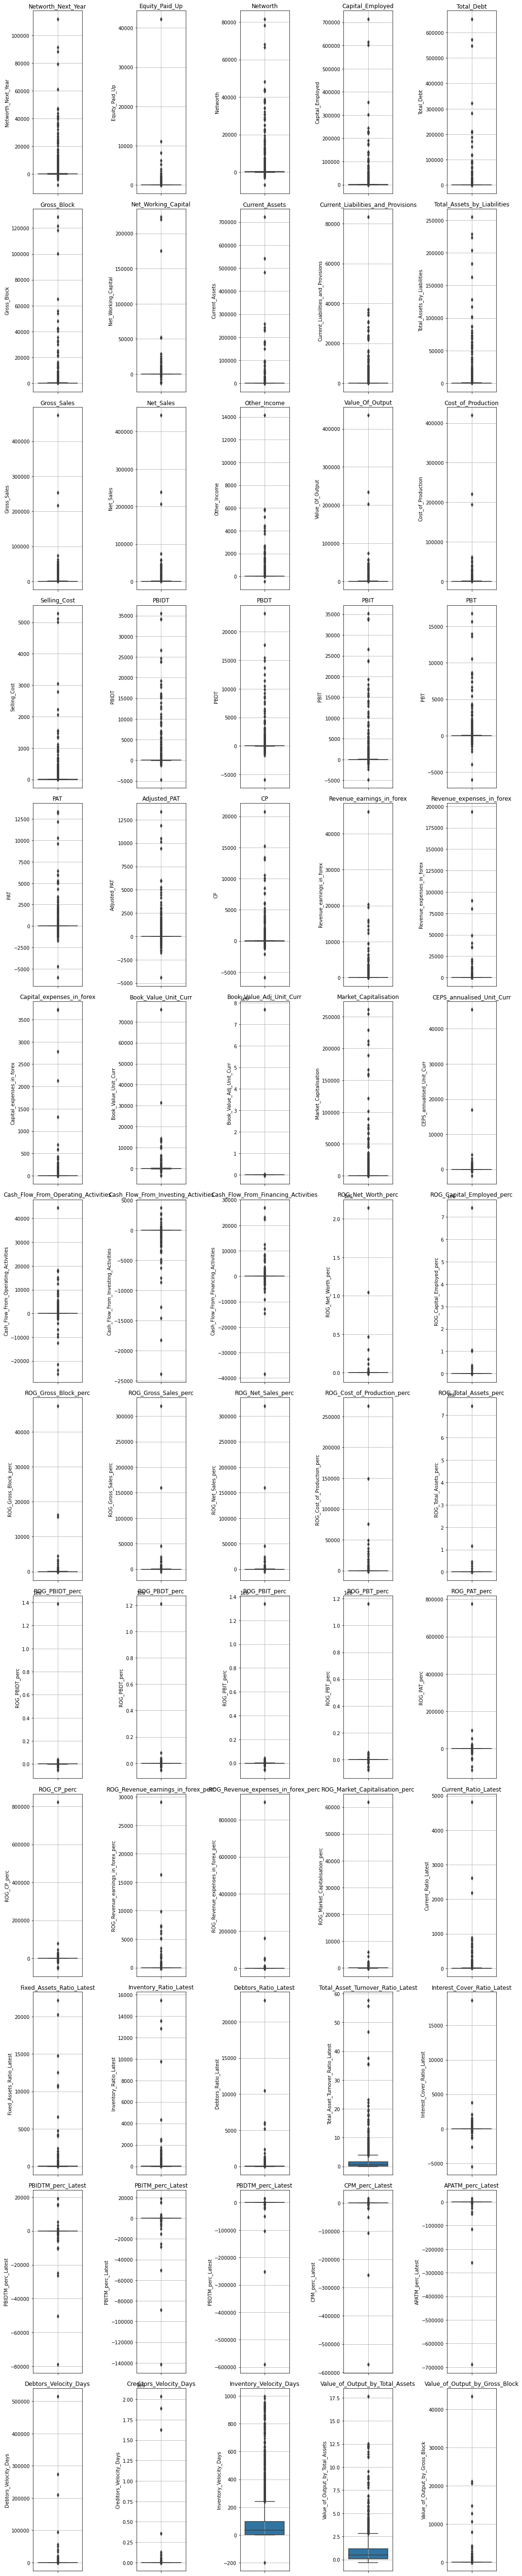

In [17]:
continuous=df.dtypes[(df.dtypes=='int64')|(df.dtypes=='float64')].index
data_plot=df[continuous]
# construct box plot for continuous variables
fig=plt.figure(figsize=(15,75))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(13,5,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i])
    plt.grid()
plt.tight_layout()

In [18]:

def outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


In [19]:
for feature in data_plot: 
    lr,ur=outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

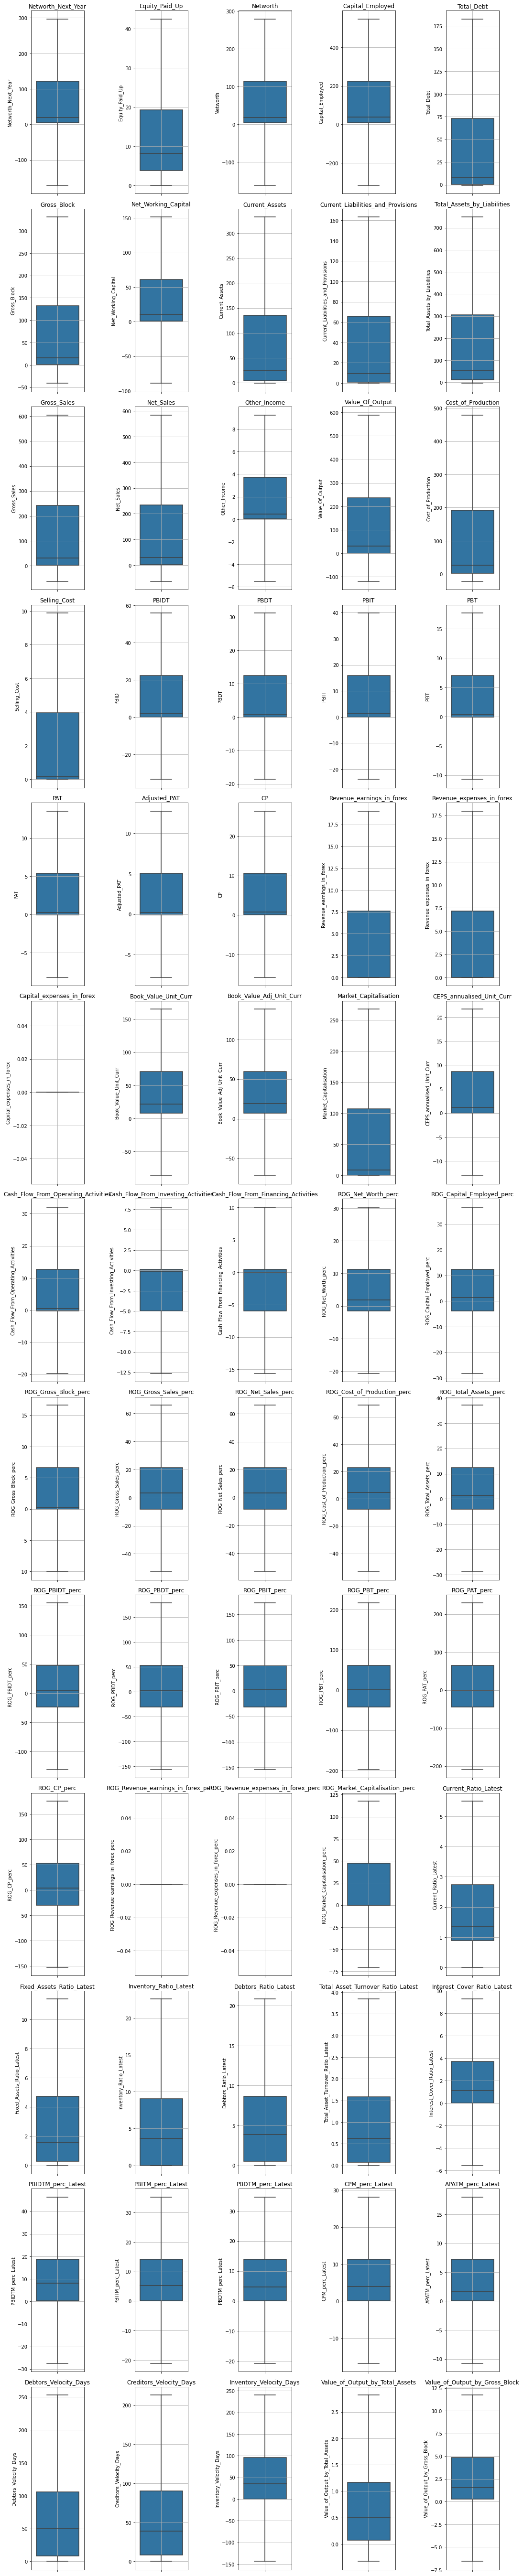

In [20]:
continuous=df.dtypes[(df.dtypes=='int64')|(df.dtypes=='float64')].index
data_plot=df[continuous]
# construct box plot for continuous variables
fig=plt.figure(figsize=(15,75))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(13,5,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i])
    plt.grid()
plt.tight_layout()

In [21]:
df['default'] = np.where((df['Networth_Next_Year'] > 0), 0, 1)

In [22]:
df[['default','Networth_Next_Year']].head(10)

,default,Networth_Next_Year
0,1,-171.84375
1,1,-171.84375
2,1,-171.84375
3,1,-171.84375
4,1,-171.84375
5,1,-171.84375
6,1,-171.84375
7,1,-171.84375
8,1,-171.84375
9,1,-171.84375


In [23]:
df['default'].value_counts()


0    3101
1     377
Name: default, dtype: int64

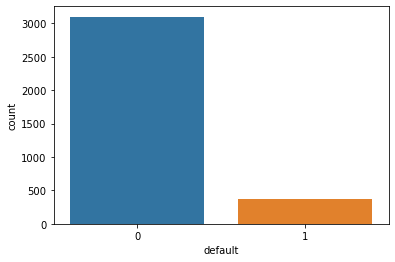

In [24]:
sns.countplot(df['default'])

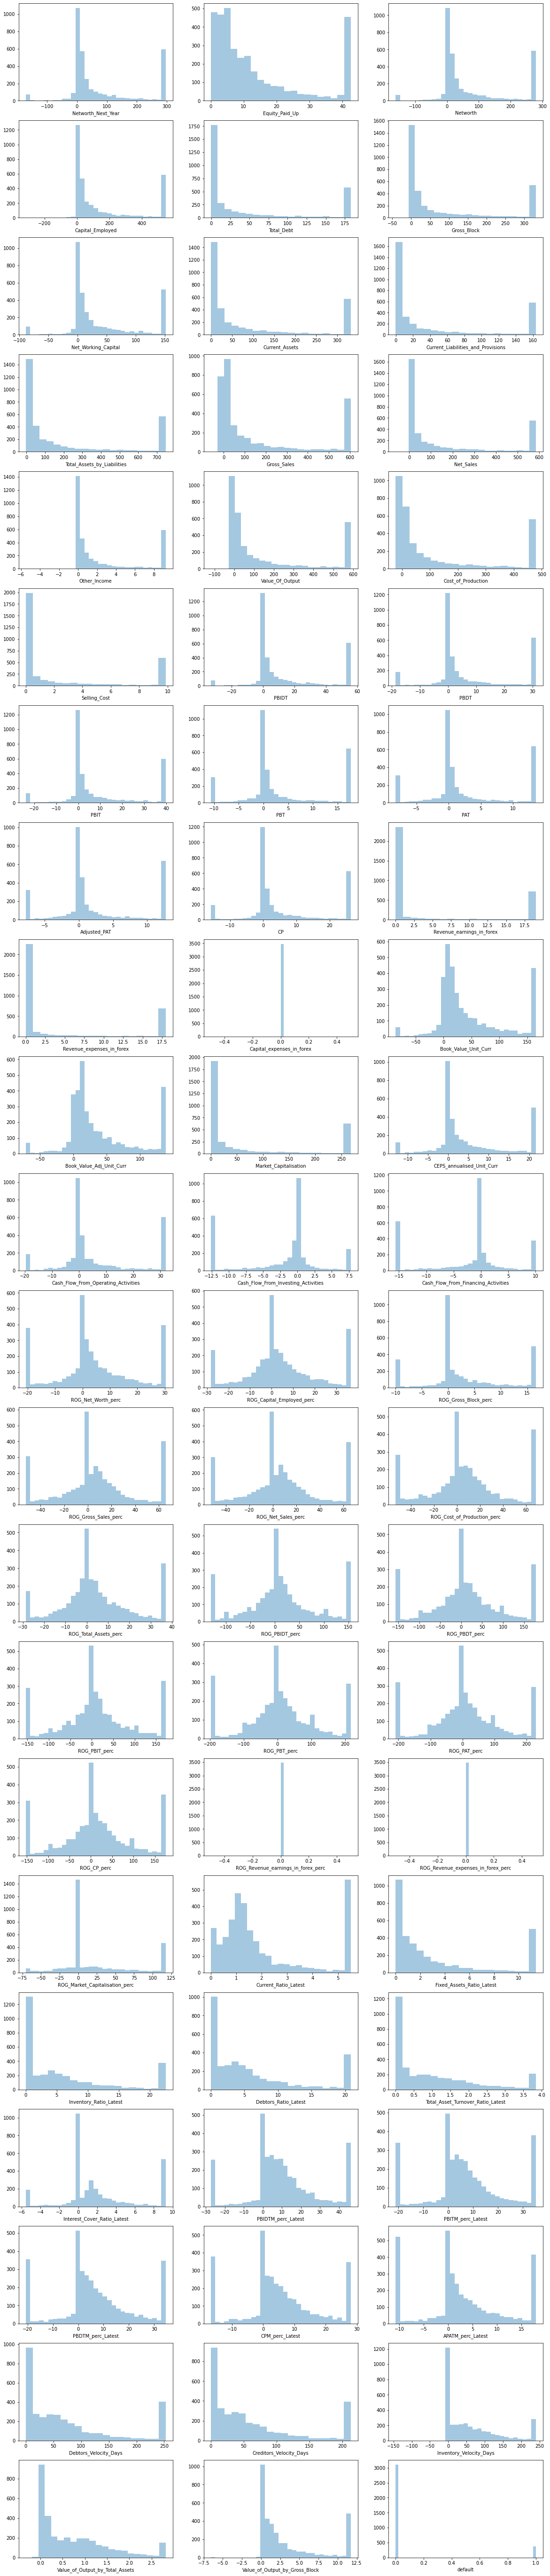

In [25]:
fig, ax = plt.subplots(figsize = (20, 100), nrows = 22, ncols = 3)

for i, col in enumerate(df.columns):
        sns.distplot(df[col], ax = ax[i//3, i%3], kde = False)

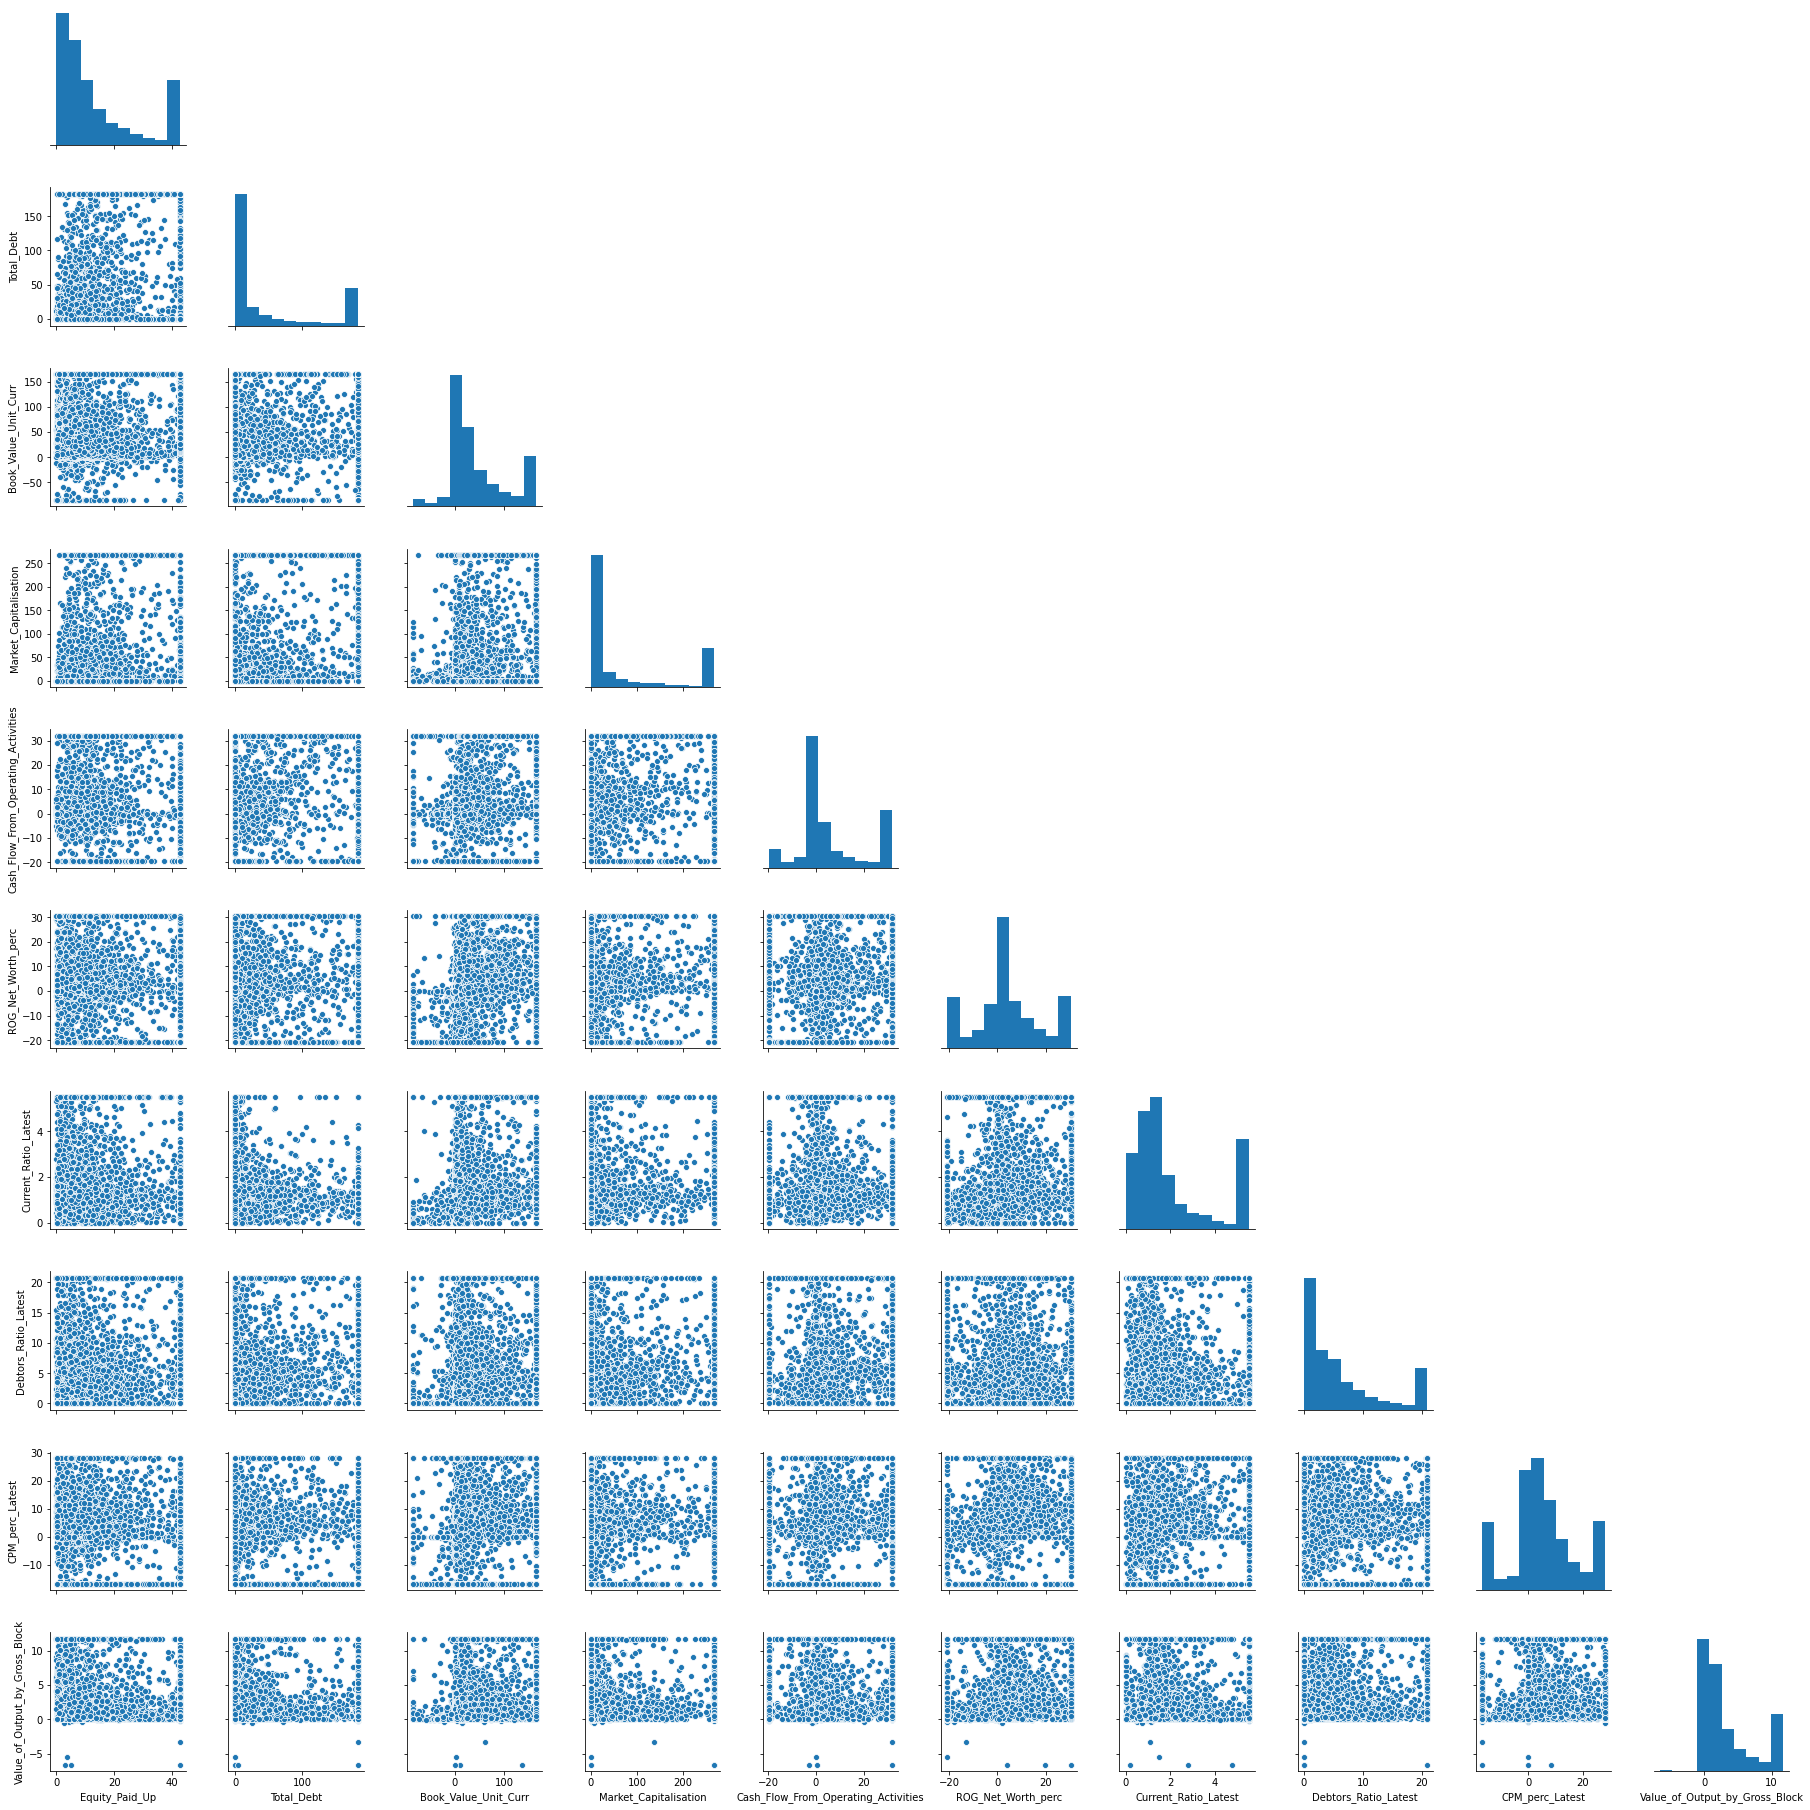

In [26]:
df_1 = df[['Equity_Paid_Up','Total_Debt','Book_Value_Unit_Curr','Market_Capitalisation','Cash_Flow_From_Operating_Activities','ROG_Net_Worth_perc','Current_Ratio_Latest','Debtors_Ratio_Latest','CPM_perc_Latest','Value_of_Output_by_Gross_Block','default']]
sns.pairplot(df_1[df_1.dtypes[(df_1.dtypes=='int64')|(df_1.dtypes=='float64')].index],corner=True)
plt.show()

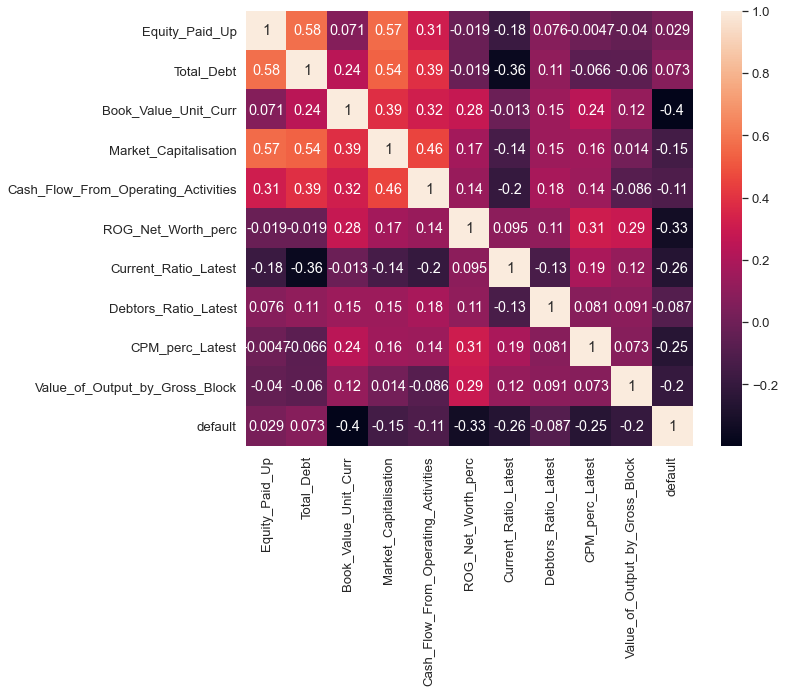

In [27]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
ax = sns.heatmap(df_1.corr(), annot=True)

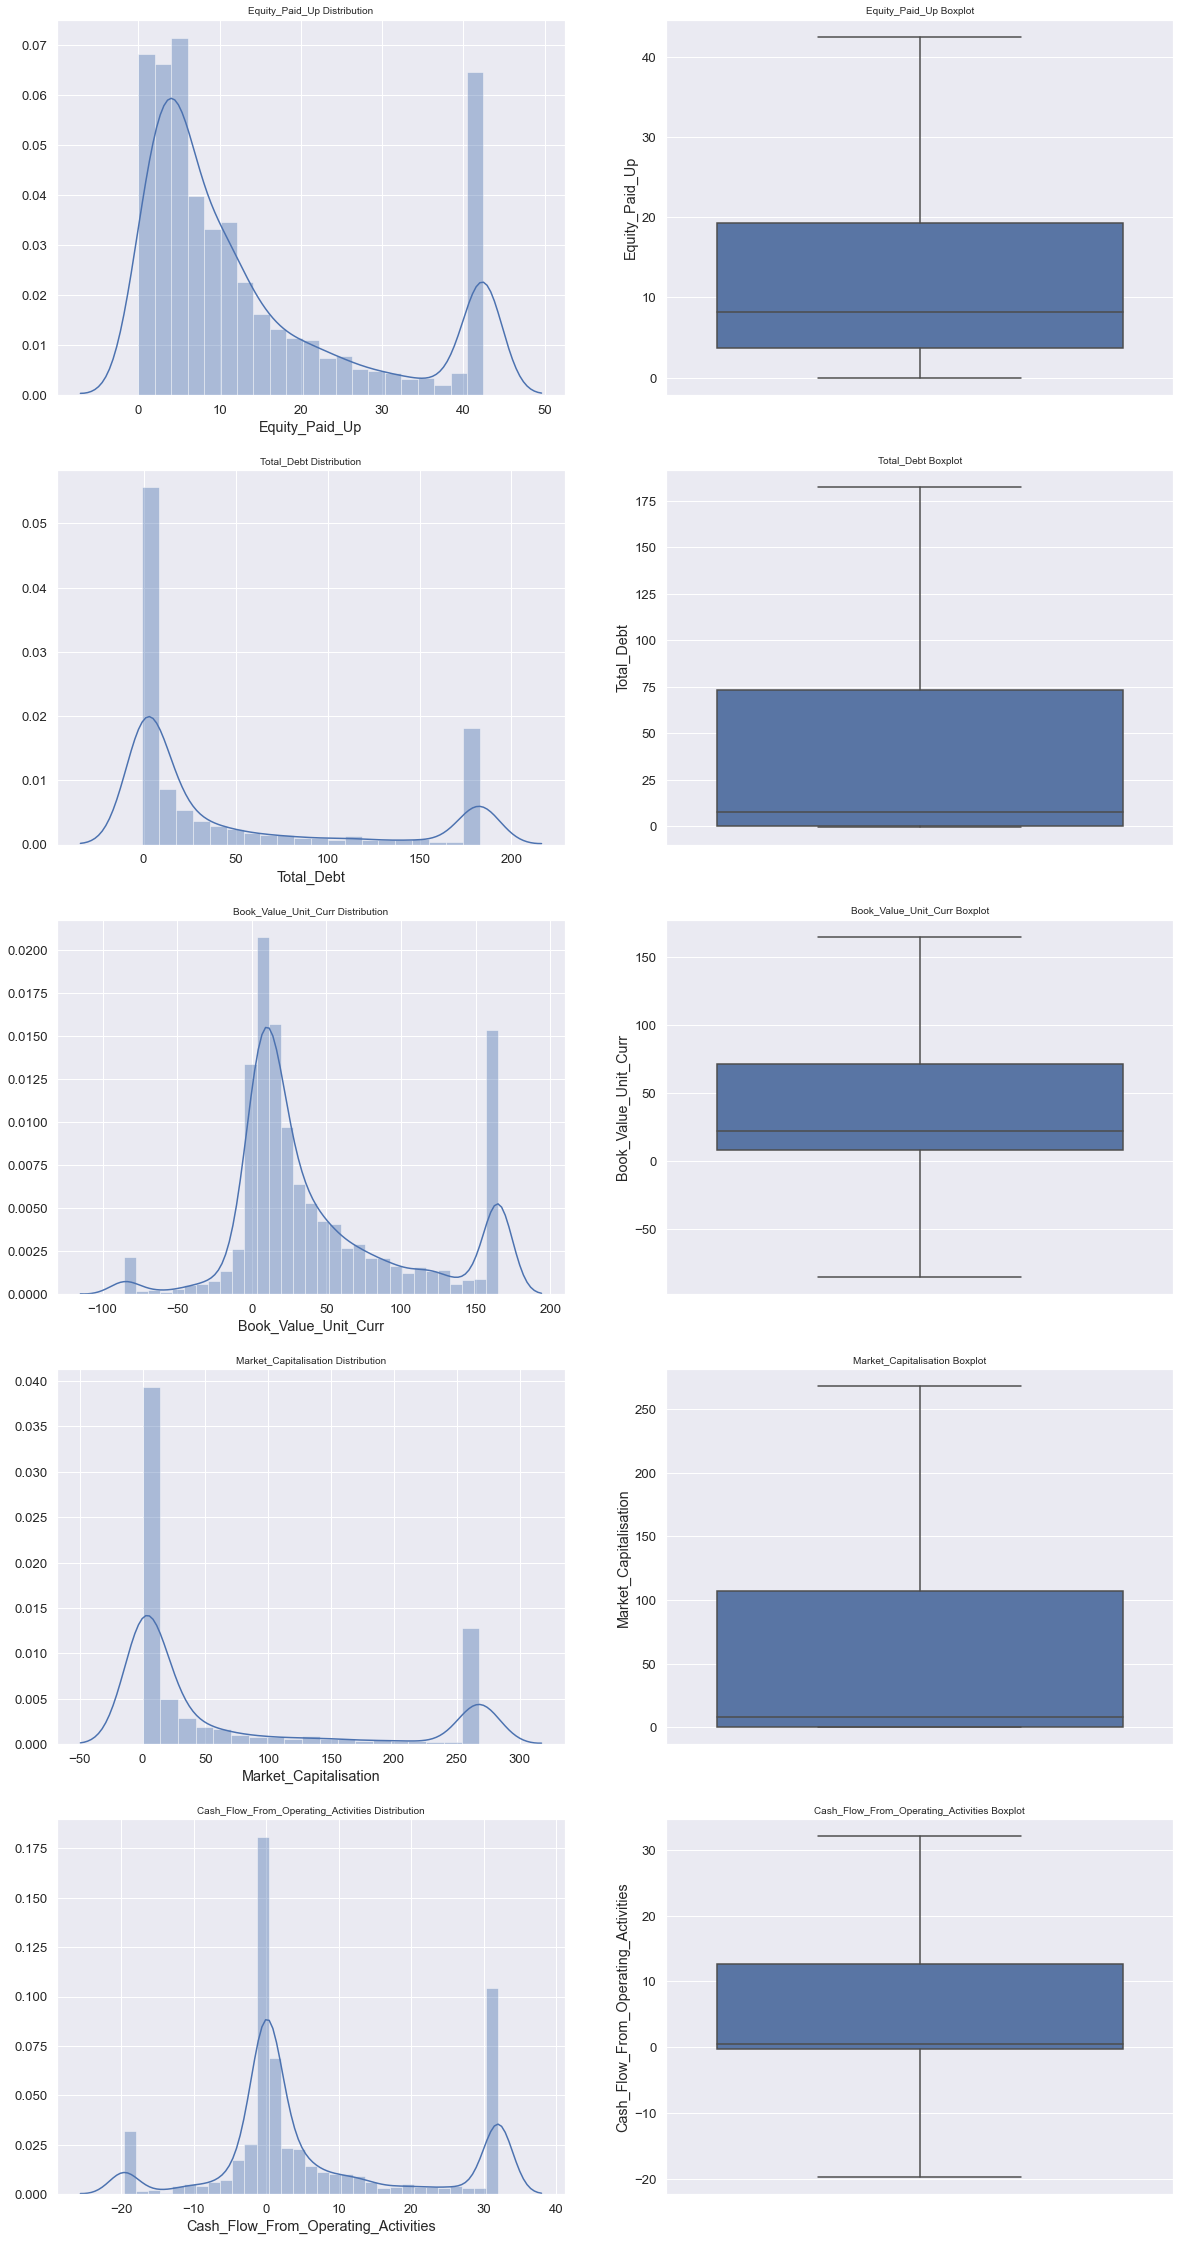

In [28]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(20,40)

a = sns.distplot(df['Equity_Paid_Up'] , ax=axes[0][0])
a.set_title("Equity_Paid_Up Distribution",fontsize=10)

a = sns.boxplot(df['Equity_Paid_Up'] , orient = "v" , ax=axes[0][1])
a.set_title("Equity_Paid_Up Boxplot",fontsize=10)

a = sns.distplot(df['Total_Debt'] , ax=axes[1][0])
a.set_title("Total_Debt Distribution",fontsize=10)

a = sns.boxplot(df['Total_Debt'] , orient = "v" , ax=axes[1][1])
a.set_title("Total_Debt Boxplot",fontsize=10)


a = sns.distplot(df['Book_Value_Unit_Curr'] , ax=axes[2][0])
a.set_title("Book_Value_Unit_Curr Distribution",fontsize=10)

a = sns.boxplot(df['Book_Value_Unit_Curr'] , orient = "v" , ax=axes[2][1])
a.set_title("Book_Value_Unit_Curr Boxplot",fontsize=10)


a = sns.distplot(df['Market_Capitalisation'] , ax=axes[3][0])
a.set_title("Market_Capitalisation Distribution",fontsize=10)

a = sns.boxplot(df['Market_Capitalisation'] , orient = "v" , ax=axes[3][1])
a.set_title("Market_Capitalisation Boxplot",fontsize=10)

a = sns.distplot(df['Cash_Flow_From_Operating_Activities'] , ax=axes[4][0])
a.set_title("Cash_Flow_From_Operating_Activities Distribution",fontsize=10)

a = sns.boxplot(df['Cash_Flow_From_Operating_Activities'] , orient = "v" , ax=axes[4][1])
a.set_title("Cash_Flow_From_Operating_Activities Boxplot",fontsize=10)

plt.show()

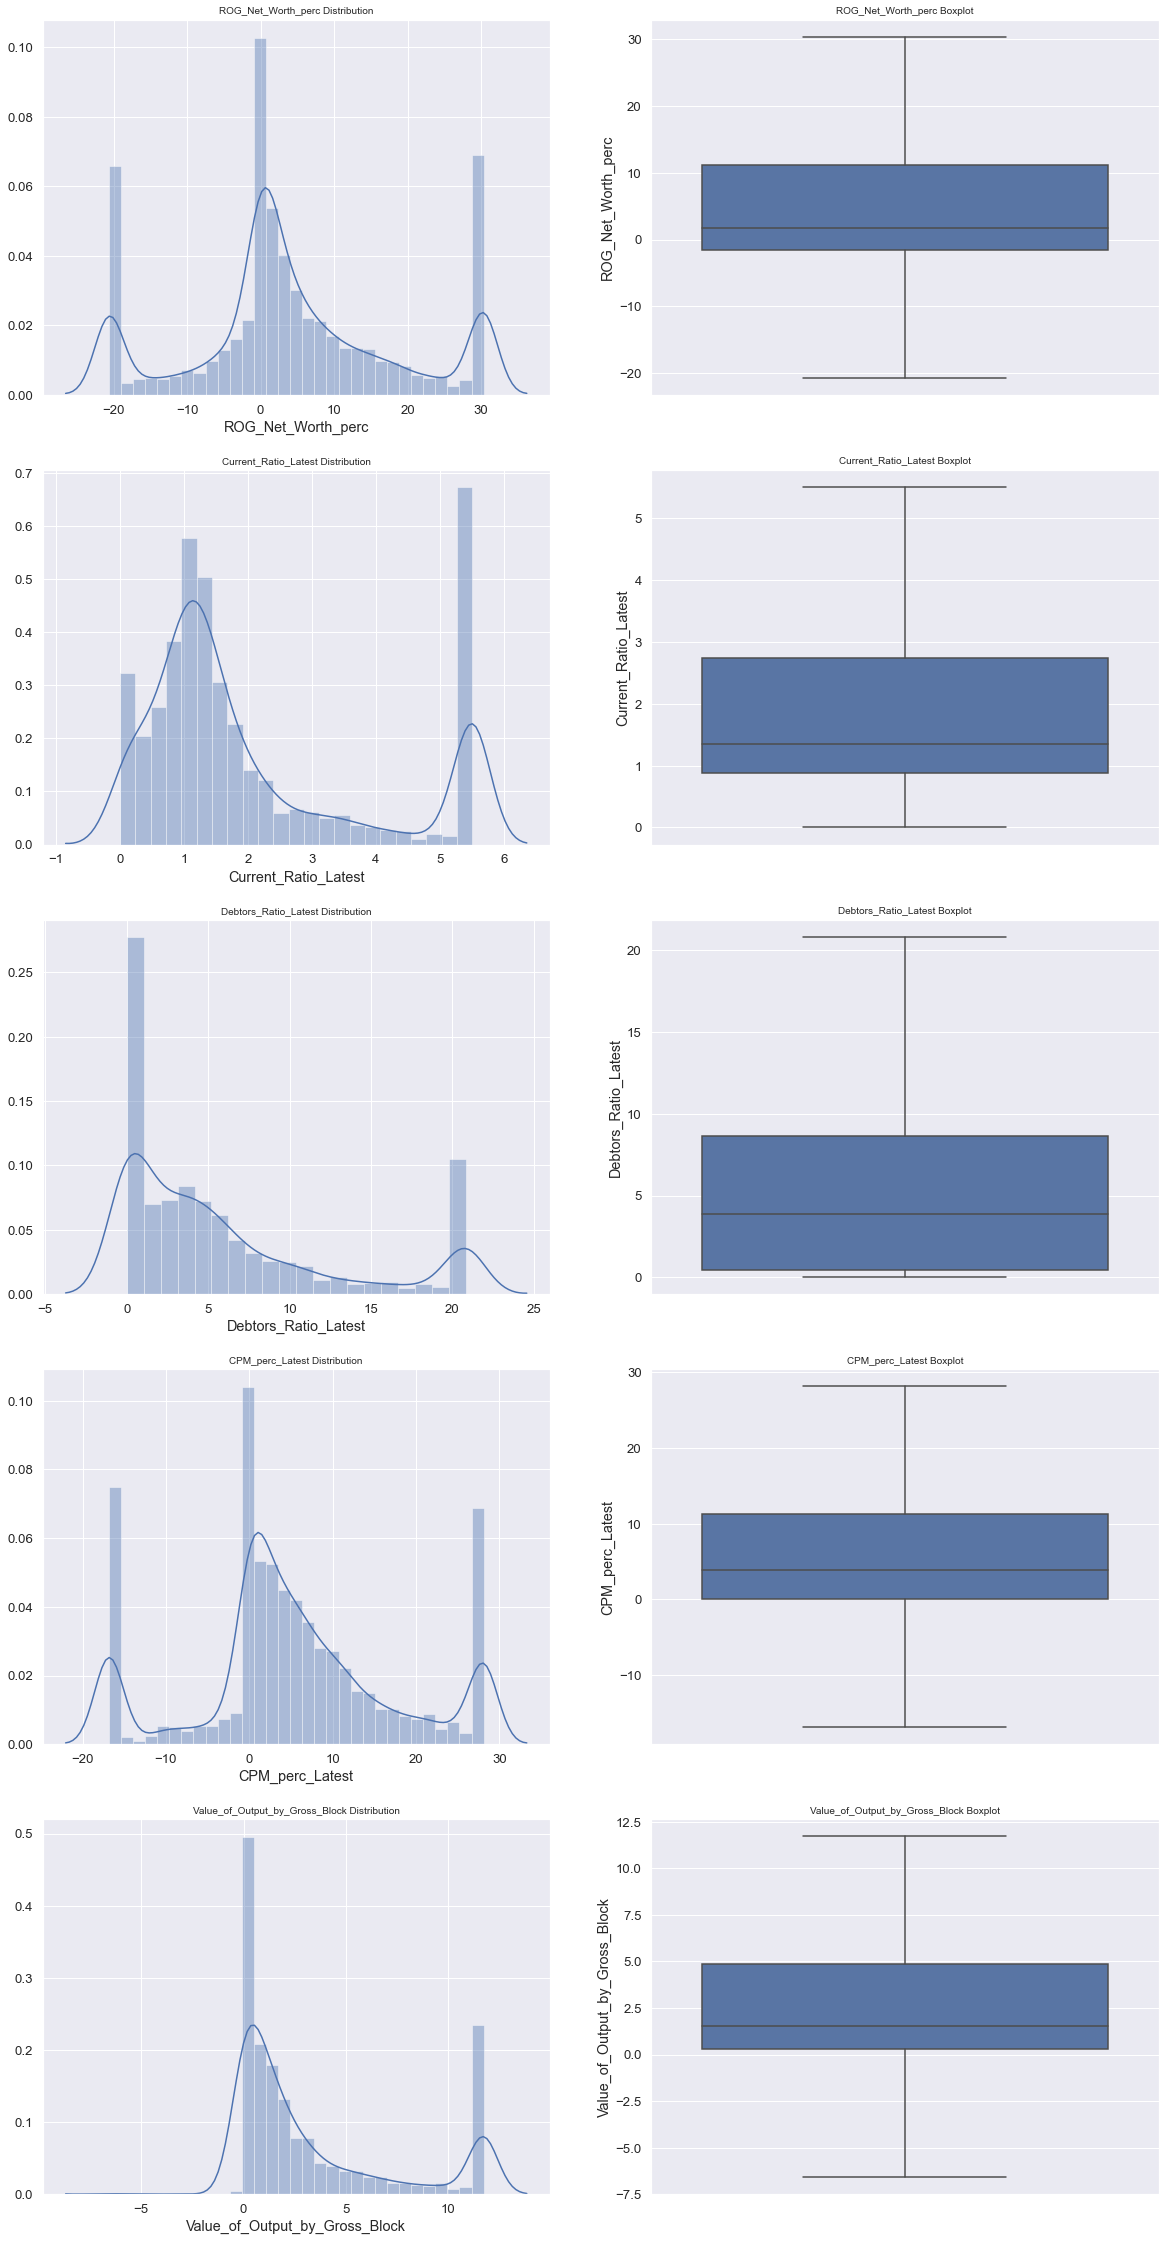

In [29]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(20,40)

a = sns.distplot(df['ROG_Net_Worth_perc'] , ax=axes[0][0])
a.set_title("ROG_Net_Worth_perc Distribution",fontsize=10)

a = sns.boxplot(df['ROG_Net_Worth_perc'] , orient = "v" , ax=axes[0][1])
a.set_title("ROG_Net_Worth_perc Boxplot",fontsize=10)


a = sns.distplot(df['Current_Ratio_Latest'] , ax=axes[1][0])
a.set_title("Current_Ratio_Latest Distribution",fontsize=10)

a = sns.boxplot(df['Current_Ratio_Latest'] , orient = "v" , ax=axes[1][1])
a.set_title("Current_Ratio_Latest Boxplot",fontsize=10)


a = sns.distplot(df['Debtors_Ratio_Latest'] , ax=axes[2][0])
a.set_title("Debtors_Ratio_Latest Distribution",fontsize=10)

a = sns.boxplot(df['Debtors_Ratio_Latest'] , orient = "v" , ax=axes[2][1])
a.set_title("Debtors_Ratio_Latest Boxplot",fontsize=10)


a = sns.distplot(df['CPM_perc_Latest'] , ax=axes[3][0])
a.set_title("CPM_perc_Latest Distribution",fontsize=10)

a = sns.boxplot(df['CPM_perc_Latest'] , orient = "v" , ax=axes[3][1])
a.set_title("CPM_perc_Latest Boxplot",fontsize=10)

a = sns.distplot(df['Value_of_Output_by_Gross_Block'] , ax=axes[4][0])
a.set_title("Value_of_Output_by_Gross_Block Distribution",fontsize=10)

a = sns.boxplot(df['Value_of_Output_by_Gross_Block'] , orient = "v" , ax=axes[4][1])
a.set_title("Value_of_Output_by_Gross_Block Boxplot",fontsize=10)

plt.show()

In [30]:
X = df.drop('default', axis = 1)
Y = df['default']

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [32]:
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
11,Net_Sales,1682.506041
10,Gross_Sales,960.802713
13,Value_Of_Output,678.451238
36,ROG_Gross_Sales_perc,527.308982
37,ROG_Net_Sales_perc,526.637225
...,...,...
48,ROG_Market_Capitalisation_perc,1.663851
35,ROG_Gross_Block_perc,1.583493
25,Capital_expenses_in_forex,NaN
46,ROG_Revenue_earnings_in_forex_perc,NaN


In [33]:
X.drop(['ROG_Revenue_earnings_in_forex_perc'], axis = 1, inplace=True)

In [34]:
X.drop(['Capital_expenses_in_forex'], axis = 1,inplace=True)

In [35]:
X.drop(['Value_Of_Output'], axis = 1,inplace=True)

In [36]:
X.drop(['Gross_Sales'], axis = 1,inplace=True)

In [37]:
X.drop(['ROG_Gross_Sales_perc'], axis = 1,inplace=True)


In [38]:
X.drop('ROG_Net_Sales_perc', axis = 1, inplace=True)

In [39]:
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
15,PBDT,114.818315
9,Total_Assets_by_Liabilities,104.545409
20,CP,102.246083
18,PAT,74.634851
17,PBT,72.726976
3,Capital_Employed,71.193785
10,Net_Sales,65.812852
12,Cost_of_Production,53.993138
7,Current_Assets,33.588305
52,CPM_perc_Latest,32.050481


In [40]:
X.drop(['PBDT'], axis = 1, inplace=True)


In [41]:
X.drop(['Total_Assets_by_Liabilities'], axis = 1, inplace=True)

In [42]:
X.drop(['PAT'], axis = 1, inplace=True)

In [43]:
X.drop(['PBT'], axis = 1, inplace=True)

In [44]:
X.drop(['Capital_Employed'], axis = 1, inplace=True)

In [45]:
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
8,Net_Sales,65.183600
10,Cost_of_Production,53.355011
47,CPM_perc_Latest,31.957359
44,PBIDTM_perc_Latest,31.644356
12,PBIDT,30.266982
45,PBITM_perc_Latest,29.090887
6,Current_Assets,28.055184
13,PBIT,27.235165
46,PBDTM_perc_Latest,27.064718
2,Networth,24.936066


In [46]:
X.drop(['Net_Sales'], axis = 1, inplace=True)


In [47]:

X.drop(['Cost_of_Production'], axis = 1, inplace=True)

In [48]:
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
45,CPM_perc_Latest,31.824197
42,PBIDTM_perc_Latest,31.399213
10,PBIDT,29.377685
43,PBITM_perc_Latest,28.930039
11,PBIT,27.227475
44,PBDTM_perc_Latest,27.046228
6,Current_Assets,26.634001
2,Networth,24.854273
29,ROG_PBDT_perc,24.095185
0,Networth_Next_Year,22.208759


In [49]:
X.drop(['ROG_Revenue_expenses_in_forex_perc'], axis = 1, inplace=True)

In [50]:
X.columns

Index(['Networth_Next_Year', 'Equity_Paid_Up', 'Networth', 'Total_Debt',
       'Gross_Block', 'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Other_Income', 'Selling_Cost',
       'PBIDT', 'PBIT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Book_Value_Unit_Curr',
       'Book_Value_Adj_Unit_Curr', 'Market_Capitalisation',
       'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc',
       'ROG_PAT_perc', 'ROG_CP_perc', 'ROG_Market_Capitalisation_perc',
       'Current_Ratio_Latest', 'Fixed_Assets_Ratio_Latest',
       'Inventory_Ratio_Latest', 'Debtors_Ratio_Latest',
       'Total_As

In [51]:
X.drop(['CP'], axis = 1, inplace=True)

In [52]:
X.columns

Index(['Networth_Next_Year', 'Equity_Paid_Up', 'Networth', 'Total_Debt',
       'Gross_Block', 'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Other_Income', 'Selling_Cost',
       'PBIDT', 'PBIT', 'Adjusted_PAT', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Book_Value_Unit_Curr',
       'Book_Value_Adj_Unit_Curr', 'Market_Capitalisation',
       'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc',
       'ROG_PAT_perc', 'ROG_CP_perc', 'ROG_Market_Capitalisation_perc',
       'Current_Ratio_Latest', 'Fixed_Assets_Ratio_Latest',
       'Inventory_Ratio_Latest', 'Debtors_Ratio_Latest',
       'Total_Asset_Tu

In [53]:
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
43,CPM_perc_Latest,31.786333
40,PBIDTM_perc_Latest,31.308214
41,PBITM_perc_Latest,28.919511
10,PBIDT,28.136195
42,PBDTM_perc_Latest,26.875383
6,Current_Assets,26.599264
11,PBIT,25.808342
2,Networth,24.853776
28,ROG_PBDT_perc,23.886462
0,Networth_Next_Year,21.929401


In [54]:
X.drop(['CPM_perc_Latest'], axis = 1, inplace=True)
X.drop(['PBIDTM_perc_Latest'], axis = 1, inplace=True)
X.drop(['PBITM_perc_Latest'], axis = 1, inplace=True)
X.drop(['PBIDT'], axis = 1, inplace=True)
X.drop(['PBIT'], axis = 1, inplace=True)
X.drop(['Current_Assets'], axis = 1, inplace=True)
X.drop(['ROG_PBDT_perc'], axis = 1, inplace=True)



In [55]:
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
2,Networth,24.448661
0,Networth_Next_Year,21.463684
12,Book_Value_Unit_Curr,17.229547
13,Book_Value_Adj_Unit_Curr,14.150199
41,Value_of_Output_by_Total_Assets,12.328814
24,ROG_PBIDT_perc,11.533019
27,ROG_PAT_perc,11.285350
25,ROG_PBIT_perc,11.023470
34,Total_Asset_Turnover_Ratio_Latest,10.862113
26,ROG_PBT_perc,10.200234


In [56]:
X.drop(['APATM_perc_Latest'], axis = 1, inplace=True)


In [57]:
X.drop(['Book_Value_Unit_Curr'], axis = 1, inplace=True)

X.drop(['Current_Liabilities_and_Provisions'], axis = 1, inplace=True)

In [58]:
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
2,Networth,24.286769
0,Networth_Next_Year,21.406046
38,Value_of_Output_by_Total_Assets,12.200674
22,ROG_PBIDT_perc,11.531216
25,ROG_PAT_perc,11.278895
23,ROG_PBIT_perc,11.016802
32,Total_Asset_Turnover_Ratio_Latest,10.739557
24,ROG_PBT_perc,10.197184
26,ROG_CP_perc,8.823586
39,Value_of_Output_by_Gross_Block,8.631305


In [59]:
X.drop(['Networth'], axis = 1, inplace=True)

X.drop(['Networth_Next_Year'], axis = 1, inplace=True)

In [60]:
X.columns

Index(['Equity_Paid_Up', 'Total_Debt', 'Gross_Block', 'Net_Working_Capital',
       'Other_Income', 'Selling_Cost', 'Adjusted_PAT',
       'Revenue_earnings_in_forex', 'Revenue_expenses_in_forex',
       'Book_Value_Adj_Unit_Curr', 'Market_Capitalisation',
       'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'ROG_PBIDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc', 'ROG_PAT_perc',
       'ROG_CP_perc', 'ROG_Market_Capitalisation_perc', 'Current_Ratio_Latest',
       'Fixed_Assets_Ratio_Latest', 'Inventory_Ratio_Latest',
       'Debtors_Ratio_Latest', 'Total_Asset_Turnover_Ratio_Latest',
       'Interest_Cover_Ratio_Latest', 'PBDTM_perc_Latest',
       'Debtors_Velocity_Days', 'Creditors_Velocity_Days',
       'Inventory_Velocity_Da

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [63]:
f_1 = 'default ~ Equity_Paid_Up + Total_Debt + Gross_Block + Net_Working_Capital + Other_Income + Selling_Cost + Adjusted_PAT + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_CP_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBDTM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block '

In [64]:
Default_train = pd.concat([X_train, y_train], axis = 1)
Default_test = pd.concat([X_test, y_test], axis = 1)

In [65]:
import statsmodels.formula.api as SM
model_1 = SM.logit(formula = f_1, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113450
         Iterations 10


In [66]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2291
Method:                           MLE   Df Model:                           38
Date:                Fri, 21 May 2021   Pseudo R-squ.:                  0.6560
Time:                        17:35:07   Log-Likelihood:                -264.34
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                9.015e-187
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.2185      0.263     -0.831      0.406      -0.734       0.297
Equity_Paid_Up                         -0.0226      0.013     -1.770      0.077      -0.048       0.002
Total_Debt                              0.0153      0.005      3.008      0.003       0.005       0.025
Gross_Block                            -0.0015      0.003     -0.465      0.642      -0.008       0.005
Net_Working_Capital                    -0.0022      0.004     -0.564      0.573      -0.010       0.005
Other_Income                            0.0012      0.064      0.019      0.985      -0.124       0.126
Selling_Cost                            0.0131      0.075      0.176      0.860      -0.133       0.160
Adjusted_PAT                            0.0022      0.050      0.044      0.965      -0.097       0.101
Revenue_earnings_in_forex              -0.0210      0.031     -0.675      0.500      -0.082       0.040
Revenue_expenses_in_forex               0.0276      0.033      0.831      0.406      -0.038       0.093
Book_Value_Adj_Unit_Curr               -0.1152      0.011    -10.028      0.000      -0.138      -0.093
Market_Capitalisation                  -0.0051      0.003     -1.791      0.073      -0.011       0.000
CEPS_annualised_Unit_Curr              -0.0770      0.038     -2.027      0.043      -0.152      -0.003
Cash_Flow_From_Operating_Activities    -0.0011      0.022     -0.050      0.960      -0.044       0.042
Cash_Flow_From_Investing_Activities     0.0047      0.047      0.100      0.920      -0.087       0.096
Cash_Flow_From_Financing_Activities     0.0106      0.038      0.277      0.782      -0.065       0.086
ROG_Net_Worth_perc                     -0.0213      0.012     -1.836      0.066      -0.044       0.001
ROG_Capital_Employed_perc               0.0230      0.011      2.150      0.032       0.002       0.044
ROG_Gross_Block_perc                   -0.0379      0.022     -1.731      0.083      -0.081       0.005
ROG_Cost_of_Production_perc            -0.0034      0.004     -0.950      0.342      -0.010       0.004
ROG_Total_Assets_perc                  -0.0242      0.011     -2.245      0.025      -0.045      -0.003
ROG_PBIDT_perc                         -0.0019      0.004     -0.519      0.604      -0.009       0.005
ROG_PBIT_perc                           0.0035      0.004      0.941      0.347      -0.004       0.011
ROG_PBT_perc                           -0.0023      0.003     -0.680      0.497      -0.009       0.004
ROG_PAT_perc                            0.0012      0.003      0.365      0.715      -0.005       0.007
ROG_CP_perc                             0.0002      0.003      0.066      0.948      -0.006       0.006
ROG_Market_Capitalisation_perc         -0.0027      0.003     -0.894      0.371      -0.008       0.003
Current_Ratio_Latest                   -0.4755      0.094     -5.083      0.000      -0.659      -0.292
Fixed_Assets_Rati

In [67]:
f_2 = 'default ~ Equity_Paid_Up + Total_Debt + Gross_Block + Net_Working_Capital + Other_Income + Selling_Cost + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_CP_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBDTM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block '

In [68]:

model_2 = SM.logit(formula = f_2, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113450
         Iterations 10


In [69]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2292
Method:                           MLE   Df Model:                           37
Date:                Fri, 21 May 2021   Pseudo R-squ.:                  0.6560
Time:                        17:35:07   Log-Likelihood:                -264.34
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                1.715e-187
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.2177      0.262     -0.830      0.407      -0.732       0.297
Equity_Paid_Up                         -0.0226      0.013     -1.772      0.076      -0.048       0.002
Total_Debt                              0.0152      0.005      3.019      0.003       0.005       0.025
Gross_Block                            -0.0015      0.003     -0.478      0.633      -0.008       0.005
Net_Working_Capital                    -0.0022      0.004     -0.562      0.574      -0.010       0.005
Other_Income                            0.0008      0.063      0.013      0.990      -0.123       0.125
Selling_Cost                            0.0131      0.075      0.176      0.861      -0.134       0.160
Revenue_earnings_in_forex              -0.0209      0.031     -0.674      0.501      -0.082       0.040
Revenue_expenses_in_forex               0.0276      0.033      0.830      0.407      -0.038       0.093
Book_Value_Adj_Unit_Curr               -0.1152      0.011    -10.059      0.000      -0.138      -0.093
Market_Capitalisation                  -0.0051      0.003     -1.807      0.071      -0.011       0.000
CEPS_annualised_Unit_Curr              -0.0764      0.035     -2.195      0.028      -0.145      -0.008
Cash_Flow_From_Operating_Activities    -0.0010      0.022     -0.045      0.964      -0.044       0.042
Cash_Flow_From_Investing_Activities     0.0045      0.047      0.097      0.923      -0.087       0.096
Cash_Flow_From_Financing_Activities     0.0107      0.038      0.279      0.780      -0.065       0.086
ROG_Net_Worth_perc                     -0.0212      0.011     -1.860      0.063      -0.043       0.001
ROG_Capital_Employed_perc               0.0230      0.011      2.150      0.032       0.002       0.044
ROG_Gross_Block_perc                   -0.0378      0.022     -1.732      0.083      -0.081       0.005
ROG_Cost_of_Production_perc            -0.0034      0.004     -0.949      0.343      -0.010       0.004
ROG_Total_Assets_perc                  -0.0242      0.011     -2.247      0.025      -0.045      -0.003
ROG_PBIDT_perc                         -0.0019      0.004     -0.521      0.602      -0.009       0.005
ROG_PBIT_perc                           0.0035      0.004      0.940      0.347      -0.004       0.011
ROG_PBT_perc                           -0.0023      0.003     -0.680      0.496      -0.009       0.004
ROG_PAT_perc                            0.0012      0.003      0.373      0.709      -0.005       0.007
ROG_CP_perc                             0.0002      0.003      0.064      0.949      -0.006       0.006
ROG_Market_Capitalisation_perc         -0.0027      0.003     -0.893      0.372      -0.008       0.003
Current_Ratio_Latest                   -0.4755      0.094     -5.083      0.000      -0.659      -0.292
Fixed_Assets_Ratio_Latest              -0.0364      0.091     -0.398      0.691      -0.216       0.143
Inventory_Ratio_L

In [70]:
f_3 = 'default ~ Equity_Paid_Up + Total_Debt + Gross_Block + Net_Working_Capital + Other_Income + Selling_Cost + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_CP_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBDTM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block '

In [71]:
model_3 = SM.logit(formula = f_3, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113450
         Iterations 10


In [72]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2293
Method:                           MLE   Df Model:                           36
Date:                Fri, 21 May 2021   Pseudo R-squ.:                  0.6560
Time:                        17:35:08   Log-Likelihood:                -264.34
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                3.219e-188
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.2181      0.262     -0.832      0.406      -0.732       0.296
Equity_Paid_Up                         -0.0227      0.013     -1.779      0.075      -0.048       0.002
Total_Debt                              0.0152      0.005      3.019      0.003       0.005       0.025
Gross_Block                            -0.0015      0.003     -0.478      0.633      -0.008       0.005
Net_Working_Capital                    -0.0022      0.004     -0.561      0.575      -0.010       0.005
Other_Income                            0.0012      0.063      0.019      0.985      -0.122       0.124
Selling_Cost                            0.0131      0.075      0.176      0.861      -0.134       0.160
Revenue_earnings_in_forex              -0.0209      0.031     -0.673      0.501      -0.082       0.040
Revenue_expenses_in_forex               0.0275      0.033      0.829      0.407      -0.038       0.092
Book_Value_Adj_Unit_Curr               -0.1152      0.011    -10.059      0.000      -0.138      -0.093
Market_Capitalisation                  -0.0051      0.003     -1.807      0.071      -0.011       0.000
CEPS_annualised_Unit_Curr              -0.0763      0.035     -2.196      0.028      -0.144      -0.008
Cash_Flow_From_Investing_Activities     0.0058      0.037      0.158      0.874      -0.066       0.078
Cash_Flow_From_Financing_Activities     0.0121      0.025      0.487      0.626      -0.036       0.061
ROG_Net_Worth_perc                     -0.0212      0.011     -1.862      0.063      -0.043       0.001
ROG_Capital_Employed_perc               0.0230      0.011      2.149      0.032       0.002       0.044
ROG_Gross_Block_perc                   -0.0377      0.022     -1.737      0.082      -0.080       0.005
ROG_Cost_of_Production_perc            -0.0034      0.004     -0.949      0.343      -0.010       0.004
ROG_Total_Assets_perc                  -0.0242      0.011     -2.251      0.024      -0.045      -0.003
ROG_PBIDT_perc                         -0.0018      0.004     -0.519      0.604      -0.009       0.005
ROG_PBIT_perc                           0.0035      0.004      0.942      0.346      -0.004       0.011
ROG_PBT_perc                           -0.0023      0.003     -0.679      0.497      -0.009       0.004
ROG_PAT_perc                            0.0012      0.003      0.372      0.710      -0.005       0.007
ROG_CP_perc                             0.0002      0.003      0.065      0.948      -0.006       0.006
ROG_Market_Capitalisation_perc         -0.0027      0.003     -0.893      0.372      -0.008       0.003
Current_Ratio_Latest                   -0.4755      0.094     -5.084      0.000      -0.659      -0.292
Fixed_Assets_Ratio_Latest              -0.0365      0.091     -0.399      0.690      -0.216       0.143
Inventory_Ratio_Latest                 -0.0305      0.023     -1.350      0.177      -0.075       0.014
Debtors_Ratio_Lat

In [73]:
f_4 = 'default ~ Equity_Paid_Up + Total_Debt + Gross_Block + Net_Working_Capital + Selling_Cost + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_CP_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBDTM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block '

In [74]:
model_4 = SM.logit(formula = f_4, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113450
         Iterations 10


In [75]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2294
Method:                           MLE   Df Model:                           35
Date:                Fri, 21 May 2021   Pseudo R-squ.:                  0.6560
Time:                        17:35:08   Log-Likelihood:                -264.34
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                5.951e-189
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.2181      0.262     -0.832      0.406      -0.732       0.296
Equity_Paid_Up                         -0.0226      0.013     -1.793      0.073      -0.047       0.002
Total_Debt                              0.0152      0.005      3.029      0.002       0.005       0.025
Gross_Block                            -0.0015      0.003     -0.483      0.629      -0.008       0.005
Net_Working_Capital                    -0.0022      0.004     -0.561      0.575      -0.010       0.005
Selling_Cost                            0.0133      0.074      0.179      0.858      -0.132       0.159
Revenue_earnings_in_forex              -0.0209      0.031     -0.675      0.500      -0.082       0.040
Revenue_expenses_in_forex               0.0275      0.033      0.829      0.407      -0.037       0.092
Book_Value_Adj_Unit_Curr               -0.1152      0.011    -10.059      0.000      -0.138      -0.093
Market_Capitalisation                  -0.0051      0.003     -1.818      0.069      -0.011       0.000
CEPS_annualised_Unit_Curr              -0.0762      0.034     -2.213      0.027      -0.144      -0.009
Cash_Flow_From_Investing_Activities     0.0059      0.036      0.161      0.872      -0.066       0.077
Cash_Flow_From_Financing_Activities     0.0120      0.024      0.489      0.625      -0.036       0.060
ROG_Net_Worth_perc                     -0.0212      0.011     -1.862      0.063      -0.043       0.001
ROG_Capital_Employed_perc               0.0230      0.011      2.149      0.032       0.002       0.044
ROG_Gross_Block_perc                   -0.0377      0.022     -1.743      0.081      -0.080       0.005
ROG_Cost_of_Production_perc            -0.0034      0.004     -0.949      0.342      -0.010       0.004
ROG_Total_Assets_perc                  -0.0242      0.011     -2.252      0.024      -0.045      -0.003
ROG_PBIDT_perc                         -0.0018      0.004     -0.519      0.604      -0.009       0.005
ROG_PBIT_perc                           0.0035      0.004      0.942      0.346      -0.004       0.011
ROG_PBT_perc                           -0.0023      0.003     -0.678      0.497      -0.009       0.004
ROG_PAT_perc                            0.0012      0.003      0.372      0.710      -0.005       0.007
ROG_CP_perc                             0.0002      0.003      0.065      0.948      -0.006       0.006
ROG_Market_Capitalisation_perc         -0.0027      0.003     -0.893      0.372      -0.008       0.003
Current_Ratio_Latest                   -0.4756      0.093     -5.096      0.000      -0.659      -0.293
Fixed_Assets_Ratio_Latest              -0.0364      0.091     -0.399      0.690      -0.215       0.142
Inventory_Ratio_Latest                 -0.0305      0.023     -1.351      0.177      -0.075       0.014
Debtors_Ratio_Latest                   -0.0397      0.025     -1.591      0.112      -0.089       0.009
Total_Asset_Turno

In [76]:
f_5 = f_1 = 'default ~ Equity_Paid_Up + Total_Debt + Gross_Block + Net_Working_Capital + Selling_Cost + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBDTM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days + Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block '

In [77]:
model_5 = SM.logit(formula = f_5, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113451
         Iterations 10


In [78]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2295
Method:                           MLE   Df Model:                           34
Date:                Fri, 21 May 2021   Pseudo R-squ.:                  0.6560
Time:                        17:35:08   Log-Likelihood:                -264.34
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                1.086e-189
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.2172      0.262     -0.829      0.407      -0.731       0.296
Equity_Paid_Up                         -0.0226      0.013     -1.793      0.073      -0.047       0.002
Total_Debt                              0.0152      0.005      3.028      0.002       0.005       0.025
Gross_Block                            -0.0015      0.003     -0.484      0.628      -0.008       0.005
Net_Working_Capital                    -0.0022      0.004     -0.558      0.577      -0.010       0.005
Selling_Cost                            0.0133      0.074      0.178      0.859      -0.133       0.159
Revenue_earnings_in_forex              -0.0209      0.031     -0.673      0.501      -0.082       0.040
Revenue_expenses_in_forex               0.0274      0.033      0.827      0.408      -0.038       0.092
Book_Value_Adj_Unit_Curr               -0.1152      0.011    -10.060      0.000      -0.138      -0.093
Market_Capitalisation                  -0.0051      0.003     -1.820      0.069      -0.011       0.000
CEPS_annualised_Unit_Curr              -0.0759      0.034     -2.230      0.026      -0.143      -0.009
Cash_Flow_From_Investing_Activities     0.0058      0.036      0.160      0.873      -0.066       0.077
Cash_Flow_From_Financing_Activities     0.0121      0.024      0.494      0.621      -0.036       0.060
ROG_Net_Worth_perc                     -0.0212      0.011     -1.862      0.063      -0.043       0.001
ROG_Capital_Employed_perc               0.0230      0.011      2.154      0.031       0.002       0.044
ROG_Gross_Block_perc                   -0.0377      0.022     -1.742      0.082      -0.080       0.005
ROG_Cost_of_Production_perc            -0.0034      0.004     -0.951      0.342      -0.010       0.004
ROG_Total_Assets_perc                  -0.0243      0.011     -2.278      0.023      -0.045      -0.003
ROG_PBIDT_perc                         -0.0017      0.003     -0.573      0.567      -0.008       0.004
ROG_PBIT_perc                           0.0034      0.004      0.939      0.348      -0.004       0.011
ROG_PBT_perc                           -0.0023      0.003     -0.682      0.495      -0.009       0.004
ROG_PAT_perc                            0.0013      0.003      0.453      0.651      -0.004       0.007
ROG_Market_Capitalisation_perc         -0.0027      0.003     -0.893      0.372      -0.008       0.003
Current_Ratio_Latest                   -0.4759      0.093     -5.102      0.000      -0.659      -0.293
Fixed_Assets_Ratio_Latest              -0.0360      0.091     -0.396      0.692      -0.215       0.142
Inventory_Ratio_Latest                 -0.0306      0.023     -1.357      0.175      -0.075       0.014
Debtors_Ratio_Latest                   -0.0396      0.025     -1.590      0.112      -0.088       0.009
Total_Asset_Turnover_Ratio_Latest      -0.1681      0.219     -0.767      0.443      -0.598       0.261
Interest_Cover_Ra

In [79]:
f_6 = 'default ~ Equity_Paid_Up + Total_Debt + Gross_Block + Net_Working_Capital + Selling_Cost + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBDTM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days +  Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block '

In [80]:
model_6 = SM.logit(formula = f_6, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113453
         Iterations 10


In [81]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2296
Method:                           MLE   Df Model:                           33
Date:                Fri, 21 May 2021   Pseudo R-squ.:                  0.6560
Time:                        17:35:08   Log-Likelihood:                -264.35
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                1.957e-190
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.2153      0.261     -0.825      0.410      -0.727       0.296
Equity_Paid_Up                         -0.0226      0.013     -1.796      0.073      -0.047       0.002
Total_Debt                              0.0153      0.005      3.038      0.002       0.005       0.025
Gross_Block                            -0.0015      0.003     -0.481      0.631      -0.008       0.005
Net_Working_Capital                    -0.0021      0.004     -0.552      0.581      -0.010       0.005
Selling_Cost                            0.0131      0.074      0.176      0.860      -0.133       0.159
Revenue_earnings_in_forex              -0.0208      0.031     -0.672      0.502      -0.082       0.040
Revenue_expenses_in_forex               0.0274      0.033      0.829      0.407      -0.037       0.092
Book_Value_Adj_Unit_Curr               -0.1151      0.011    -10.089      0.000      -0.137      -0.093
Market_Capitalisation                  -0.0051      0.003     -1.819      0.069      -0.011       0.000
CEPS_annualised_Unit_Curr              -0.0758      0.034     -2.230      0.026      -0.142      -0.009
Cash_Flow_From_Investing_Activities     0.0062      0.036      0.171      0.864      -0.065       0.077
Cash_Flow_From_Financing_Activities     0.0120      0.024      0.492      0.623      -0.036       0.060
ROG_Net_Worth_perc                     -0.0212      0.011     -1.871      0.061      -0.043       0.001
ROG_Capital_Employed_perc               0.0230      0.011      2.155      0.031       0.002       0.044
ROG_Gross_Block_perc                   -0.0376      0.022     -1.739      0.082      -0.080       0.005
ROG_Cost_of_Production_perc            -0.0034      0.004     -0.959      0.338      -0.010       0.004
ROG_Total_Assets_perc                  -0.0243      0.011     -2.277      0.023      -0.045      -0.003
ROG_PBIDT_perc                         -0.0017      0.003     -0.570      0.569      -0.008       0.004
ROG_PBIT_perc                           0.0034      0.004      0.936      0.349      -0.004       0.011
ROG_PBT_perc                           -0.0023      0.003     -0.691      0.490      -0.009       0.004
ROG_PAT_perc                            0.0013      0.003      0.460      0.646      -0.004       0.007
ROG_Market_Capitalisation_perc         -0.0027      0.003     -0.900      0.368      -0.008       0.003
Current_Ratio_Latest                   -0.4754      0.093     -5.107      0.000      -0.658      -0.293
Fixed_Assets_Ratio_Latest              -0.0359      0.091     -0.395      0.693      -0.214       0.142
Inventory_Ratio_Latest                 -0.0309      0.022     -1.385      0.166      -0.075       0.013
Debtors_Ratio_Latest                   -0.0393      0.025     -1.592      0.111      -0.088       0.009
Total_Asset_Turnover_Ratio_Latest      -0.1673      0.219     -0.764      0.445      -0.596       0.262
Interest_Cover_Ra

In [82]:
f_7 = 'default ~ Equity_Paid_Up + Total_Debt + Gross_Block + Net_Working_Capital + Selling_Cost + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr +  Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBDTM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days +  Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block '

In [83]:
model_7 = SM.logit(formula = f_7, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113460
         Iterations 10


In [84]:
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2297
Method:                           MLE   Df Model:                           32
Date:                Fri, 21 May 2021   Pseudo R-squ.:                  0.6559
Time:                        17:35:09   Log-Likelihood:                -264.36
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                3.505e-191
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.2151      0.261     -0.824      0.410      -0.727       0.297
Equity_Paid_Up                         -0.0228      0.013     -1.808      0.071      -0.047       0.002
Total_Debt                              0.0153      0.005      3.051      0.002       0.005       0.025
Gross_Block                            -0.0016      0.003     -0.504      0.614      -0.008       0.004
Net_Working_Capital                    -0.0021      0.004     -0.555      0.579      -0.010       0.005
Selling_Cost                            0.0108      0.073      0.148      0.882      -0.132       0.154
Revenue_earnings_in_forex              -0.0199      0.030     -0.653      0.514      -0.080       0.040
Revenue_expenses_in_forex               0.0268      0.033      0.816      0.415      -0.038       0.091
Book_Value_Adj_Unit_Curr               -0.1153      0.011    -10.145      0.000      -0.138      -0.093
Market_Capitalisation                  -0.0051      0.003     -1.830      0.067      -0.011       0.000
CEPS_annualised_Unit_Curr              -0.0758      0.034     -2.233      0.026      -0.142      -0.009
Cash_Flow_From_Financing_Activities     0.0112      0.024      0.468      0.640      -0.036       0.058
ROG_Net_Worth_perc                     -0.0213      0.011     -1.877      0.061      -0.044       0.001
ROG_Capital_Employed_perc               0.0230      0.011      2.154      0.031       0.002       0.044
ROG_Gross_Block_perc                   -0.0382      0.021     -1.786      0.074      -0.080       0.004
ROG_Cost_of_Production_perc            -0.0034      0.004     -0.958      0.338      -0.010       0.004
ROG_Total_Assets_perc                  -0.0245      0.011     -2.328      0.020      -0.045      -0.004
ROG_PBIDT_perc                         -0.0017      0.003     -0.580      0.562      -0.008       0.004
ROG_PBIT_perc                           0.0034      0.004      0.936      0.349      -0.004       0.011
ROG_PBT_perc                           -0.0023      0.003     -0.683      0.494      -0.009       0.004
ROG_PAT_perc                            0.0013      0.003      0.463      0.644      -0.004       0.007
ROG_Market_Capitalisation_perc         -0.0026      0.003     -0.892      0.373      -0.008       0.003
Current_Ratio_Latest                   -0.4753      0.093     -5.106      0.000      -0.658      -0.293
Fixed_Assets_Ratio_Latest              -0.0353      0.091     -0.388      0.698      -0.213       0.143
Inventory_Ratio_Latest                 -0.0311      0.022     -1.399      0.162      -0.075       0.013
Debtors_Ratio_Latest                   -0.0392      0.025     -1.587      0.113      -0.088       0.009
Total_Asset_Turnover_Ratio_Latest      -0.1654      0.219     -0.757      0.449      -0.594       0.263
Interest_Cover_Ratio_Latest            -0.1387      0.054     -2.560      0.010      -0.245      -0.032
PBDTM_perc_Latest

In [85]:
f_8 = 'default ~ Equity_Paid_Up + Total_Debt + Gross_Block + Net_Working_Capital + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr +  Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBDTM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days +  Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block '

In [86]:
model_8 = SM.logit(formula = f_8, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113464
         Iterations 10


In [87]:
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2298
Method:                           MLE   Df Model:                           31
Date:                Fri, 21 May 2021   Pseudo R-squ.:                  0.6559
Time:                        17:35:09   Log-Likelihood:                -264.37
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                6.157e-192
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.2178      0.261     -0.836      0.403      -0.729       0.293
Equity_Paid_Up                         -0.0227      0.013     -1.802      0.072      -0.047       0.002
Total_Debt                              0.0153      0.005      3.057      0.002       0.006       0.025
Gross_Block                            -0.0015      0.003     -0.486      0.627      -0.007       0.004
Net_Working_Capital                    -0.0021      0.004     -0.542      0.588      -0.010       0.005
Revenue_earnings_in_forex              -0.0188      0.029     -0.637      0.524      -0.077       0.039
Revenue_expenses_in_forex               0.0279      0.032      0.873      0.383      -0.035       0.091
Book_Value_Adj_Unit_Curr               -0.1153      0.011    -10.152      0.000      -0.138      -0.093
Market_Capitalisation                  -0.0051      0.003     -1.826      0.068      -0.011       0.000
CEPS_annualised_Unit_Curr              -0.0756      0.034     -2.234      0.026      -0.142      -0.009
Cash_Flow_From_Financing_Activities     0.0110      0.024      0.460      0.645      -0.036       0.058
ROG_Net_Worth_perc                     -0.0214      0.011     -1.896      0.058      -0.044       0.001
ROG_Capital_Employed_perc               0.0230      0.011      2.157      0.031       0.002       0.044
ROG_Gross_Block_perc                   -0.0382      0.021     -1.787      0.074      -0.080       0.004
ROG_Cost_of_Production_perc            -0.0034      0.004     -0.962      0.336      -0.010       0.004
ROG_Total_Assets_perc                  -0.0245      0.011     -2.324      0.020      -0.045      -0.004
ROG_PBIDT_perc                         -0.0017      0.003     -0.580      0.562      -0.008       0.004
ROG_PBIT_perc                           0.0034      0.004      0.938      0.348      -0.004       0.011
ROG_PBT_perc                           -0.0024      0.003     -0.700      0.484      -0.009       0.004
ROG_PAT_perc                            0.0013      0.003      0.480      0.631      -0.004       0.007
ROG_Market_Capitalisation_perc         -0.0026      0.003     -0.892      0.373      -0.008       0.003
Current_Ratio_Latest                   -0.4748      0.093     -5.103      0.000      -0.657      -0.292
Fixed_Assets_Ratio_Latest              -0.0351      0.091     -0.386      0.700      -0.213       0.143
Inventory_Ratio_Latest                 -0.0314      0.022     -1.415      0.157      -0.075       0.012
Debtors_Ratio_Latest                   -0.0391      0.025     -1.583      0.113      -0.087       0.009
Total_Asset_Turnover_Ratio_Latest      -0.1643      0.218     -0.752      0.452      -0.592       0.264
Interest_Cover_Ratio_Latest            -0.1385      0.054     -2.558      0.011      -0.245      -0.032
PBDTM_perc_Latest                      -0.0251      0.010     -2.469      0.014      -0.045      -0.005
Debtors_Velocity_

In [88]:
f_9 = 'default ~ Equity_Paid_Up + Total_Debt + Gross_Block + Net_Working_Capital + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBDTM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days +  Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block '

In [89]:
model_9 = SM.logit(formula = f_9, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113510
         Iterations 10


In [90]:
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2299
Method:                           MLE   Df Model:                           30
Date:                Fri, 21 May 2021   Pseudo R-squ.:                  0.6558
Time:                        17:35:09   Log-Likelihood:                -264.48
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                1.167e-192
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.2211      0.261     -0.848      0.396      -0.732       0.290
Equity_Paid_Up                       -0.0223      0.013     -1.778      0.075      -0.047       0.002
Total_Debt                            0.0152      0.005      3.072      0.002       0.006       0.025
Gross_Block                          -0.0018      0.003     -0.610      0.542      -0.008       0.004
Net_Working_Capital                  -0.0022      0.004     -0.593      0.553      -0.010       0.005
Revenue_earnings_in_forex            -0.0191      0.029     -0.649      0.516      -0.077       0.039
Revenue_expenses_in_forex             0.0278      0.032      0.872      0.383      -0.035       0.090
Book_Value_Adj_Unit_Curr             -0.1156      0.011    -10.173      0.000      -0.138      -0.093
Market_Capitalisation                -0.0048      0.003     -1.784      0.074      -0.010       0.000
CEPS_annualised_Unit_Curr            -0.0767      0.034     -2.260      0.024      -0.143      -0.010
ROG_Net_Worth_perc                   -0.0223      0.011     -1.996      0.046      -0.044      -0.000
ROG_Capital_Employed_perc             0.0245      0.010      2.418      0.016       0.005       0.044
ROG_Gross_Block_perc                 -0.0372      0.021     -1.753      0.080      -0.079       0.004
ROG_Cost_of_Production_perc          -0.0033      0.004     -0.933      0.351      -0.010       0.004
ROG_Total_Assets_perc                -0.0243      0.011     -2.308      0.021      -0.045      -0.004
ROG_PBIDT_perc                       -0.0016      0.003     -0.549      0.583      -0.008       0.004
ROG_PBIT_perc                         0.0032      0.004      0.885      0.376      -0.004       0.010
ROG_PBT_perc                         -0.0023      0.003     -0.686      0.493      -0.009       0.004
ROG_PAT_perc                          0.0014      0.003      0.499      0.618      -0.004       0.007
ROG_Market_Capitalisation_perc       -0.0027      0.003     -0.912      0.362      -0.008       0.003
Current_Ratio_Latest                 -0.4739      0.093     -5.095      0.000      -0.656      -0.292
Fixed_Assets_Ratio_Latest            -0.0371      0.091     -0.408      0.683      -0.215       0.141
Inventory_Ratio_Latest               -0.0313      0.022     -1.410      0.158      -0.075       0.012
Debtors_Ratio_Latest                 -0.0394      0.025     -1.599      0.110      -0.088       0.009
Total_Asset_Turnover_Ratio_Latest    -0.1597      0.218     -0.733      0.464      -0.587       0.267
Interest_Cover_Ratio_Latest          -0.1390      0.054     -2.570      0.010      -0.245      -0.033
PBDTM_perc_Latest                    -0.0256      0.010     -2.522      0.012      -0.045      -0.006
Debtors_Velocity_Days                -0.0031      0.001     -2.226      0.026      -0.006      -0.000
Creditors_Velocity_Days               0.0014      0.002      0.905      0.365  

In [91]:
f_10 = 'default ~ Equity_Paid_Up + Total_Debt + Gross_Block + Net_Working_Capital + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest  + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBDTM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days +  Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block '

In [92]:
model_10 = SM.logit(formula = f_10, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113546
         Iterations 10


In [93]:
model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2300
Method:                           MLE   Df Model:                           29
Date:                Fri, 21 May 2021   Pseudo R-squ.:                  0.6557
Time:                        17:35:09   Log-Likelihood:                -264.56
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                2.127e-193
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.2182      0.261     -0.837      0.402      -0.729       0.293
Equity_Paid_Up                       -0.0223      0.013     -1.777      0.076      -0.047       0.002
Total_Debt                            0.0151      0.005      3.061      0.002       0.005       0.025
Gross_Block                          -0.0017      0.003     -0.567      0.571      -0.007       0.004
Net_Working_Capital                  -0.0023      0.004     -0.607      0.544      -0.010       0.005
Revenue_earnings_in_forex            -0.0191      0.029     -0.650      0.515      -0.077       0.039
Revenue_expenses_in_forex             0.0272      0.032      0.854      0.393      -0.035       0.090
Book_Value_Adj_Unit_Curr             -0.1158      0.011    -10.187      0.000      -0.138      -0.093
Market_Capitalisation                -0.0049      0.003     -1.806      0.071      -0.010       0.000
CEPS_annualised_Unit_Curr            -0.0766      0.034     -2.258      0.024      -0.143      -0.010
ROG_Net_Worth_perc                   -0.0223      0.011     -1.998      0.046      -0.044      -0.000
ROG_Capital_Employed_perc             0.0246      0.010      2.421      0.015       0.005       0.044
ROG_Gross_Block_perc                 -0.0370      0.021     -1.742      0.082      -0.079       0.005
ROG_Cost_of_Production_perc          -0.0033      0.004     -0.937      0.349      -0.010       0.004
ROG_Total_Assets_perc                -0.0244      0.011     -2.323      0.020      -0.045      -0.004
ROG_PBIDT_perc                       -0.0017      0.003     -0.568      0.570      -0.008       0.004
ROG_PBIT_perc                         0.0033      0.004      0.898      0.369      -0.004       0.010
ROG_PBT_perc                         -0.0023      0.003     -0.679      0.497      -0.009       0.004
ROG_PAT_perc                          0.0013      0.003      0.487      0.626      -0.004       0.007
ROG_Market_Capitalisation_perc       -0.0027      0.003     -0.916      0.360      -0.008       0.003
Current_Ratio_Latest                 -0.4761      0.093     -5.123      0.000      -0.658      -0.294
Inventory_Ratio_Latest               -0.0316      0.022     -1.422      0.155      -0.075       0.012
Debtors_Ratio_Latest                 -0.0403      0.025     -1.640      0.101      -0.088       0.008
Total_Asset_Turnover_Ratio_Latest    -0.1702      0.216     -0.788      0.431      -0.594       0.253
Interest_Cover_Ratio_Latest          -0.1400      0.054     -2.591      0.010      -0.246      -0.034
PBDTM_perc_Latest                    -0.0253      0.010     -2.501      0.012      -0.045      -0.005
Debtors_Velocity_Days                -0.0032      0.001     -2.238      0.025      -0.006      -0.000
Creditors_Velocity_Days               0.0014      0.002      0.889      0.374      -0.002       0.004
Value_of_Output_by_Total_Assets       0.7622      0.371      2.052      0.040  

In [94]:
f_11 = 'default ~ Equity_Paid_Up + Total_Debt  + Net_Working_Capital + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest  + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBDTM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days +  Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block '

In [95]:
model_11 = SM.logit(formula = f_11, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113615
         Iterations 10


In [96]:
model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2301
Method:                           MLE   Df Model:                           28
Date:                Fri, 21 May 2021   Pseudo R-squ.:                  0.6555
Time:                        17:35:09   Log-Likelihood:                -264.72
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                4.107e-194
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.2101      0.260     -0.808      0.419      -0.720       0.300
Equity_Paid_Up                       -0.0229      0.012     -1.834      0.067      -0.047       0.002
Total_Debt                            0.0134      0.004      3.465      0.001       0.006       0.021
Net_Working_Capital                  -0.0021      0.004     -0.565      0.572      -0.009       0.005
Revenue_earnings_in_forex            -0.0217      0.029     -0.745      0.456      -0.079       0.035
Revenue_expenses_in_forex             0.0238      0.031      0.759      0.448      -0.038       0.085
Book_Value_Adj_Unit_Curr             -0.1161      0.011    -10.248      0.000      -0.138      -0.094
Market_Capitalisation                -0.0052      0.003     -1.988      0.047      -0.010   -7.27e-05
CEPS_annualised_Unit_Curr            -0.0766      0.034     -2.276      0.023      -0.142      -0.011
ROG_Net_Worth_perc                   -0.0221      0.011     -1.984      0.047      -0.044      -0.000
ROG_Capital_Employed_perc             0.0247      0.010      2.442      0.015       0.005       0.044
ROG_Gross_Block_perc                 -0.0365      0.021     -1.723      0.085      -0.078       0.005
ROG_Cost_of_Production_perc          -0.0033      0.004     -0.920      0.357      -0.010       0.004
ROG_Total_Assets_perc                -0.0242      0.011     -2.305      0.021      -0.045      -0.004
ROG_PBIDT_perc                       -0.0018      0.003     -0.607      0.544      -0.008       0.004
ROG_PBIT_perc                         0.0033      0.004      0.921      0.357      -0.004       0.010
ROG_PBT_perc                         -0.0024      0.003     -0.703      0.482      -0.009       0.004
ROG_PAT_perc                          0.0014      0.003      0.512      0.609      -0.004       0.007
ROG_Market_Capitalisation_perc       -0.0026      0.003     -0.890      0.373      -0.008       0.003
Current_Ratio_Latest                 -0.4748      0.093     -5.125      0.000      -0.656      -0.293
Inventory_Ratio_Latest               -0.0313      0.022     -1.414      0.157      -0.075       0.012
Debtors_Ratio_Latest                 -0.0425      0.024     -1.752      0.080      -0.090       0.005
Total_Asset_Turnover_Ratio_Latest    -0.1757      0.216     -0.814      0.416      -0.599       0.247
Interest_Cover_Ratio_Latest          -0.1404      0.054     -2.595      0.009      -0.246      -0.034
PBDTM_perc_Latest                    -0.0254      0.010     -2.518      0.012      -0.045      -0.006
Debtors_Velocity_Days                -0.0031      0.001     -2.224      0.026      -0.006      -0.000
Creditors_Velocity_Days               0.0013      0.002      0.877      0.380      -0.002       0.004
Value_of_Output_by_Total_Assets       0.7619      0.371      2.054      0.040       0.035       1.489
Value_of_Output_by_Gross_Block       -0.0952      0.051     -1.880      0.060  

In [97]:
f_12 = 'default ~ Equity_Paid_Up + Total_Debt  + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest  + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBDTM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days +  Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block '

In [98]:
model_12 = SM.logit(formula = f_12, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113684
         Iterations 10


In [99]:
model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2302
Method:                           MLE   Df Model:                           27
Date:                Fri, 21 May 2021   Pseudo R-squ.:                  0.6553
Time:                        17:35:09   Log-Likelihood:                -264.88
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                7.776e-195
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.2056      0.260     -0.791      0.429      -0.715       0.304
Equity_Paid_Up                       -0.0226      0.012     -1.821      0.069      -0.047       0.002
Total_Debt                            0.0124      0.003      3.644      0.000       0.006       0.019
Revenue_earnings_in_forex            -0.0202      0.029     -0.698      0.485      -0.077       0.036
Revenue_expenses_in_forex             0.0210      0.031      0.676      0.499      -0.040       0.082
Book_Value_Adj_Unit_Curr             -0.1174      0.011    -10.543      0.000      -0.139      -0.096
Market_Capitalisation                -0.0052      0.003     -1.972      0.049      -0.010   -3.19e-05
CEPS_annualised_Unit_Curr            -0.0770      0.034     -2.288      0.022      -0.143      -0.011
ROG_Net_Worth_perc                   -0.0220      0.011     -1.982      0.047      -0.044      -0.000
ROG_Capital_Employed_perc             0.0243      0.010      2.411      0.016       0.005       0.044
ROG_Gross_Block_perc                 -0.0359      0.021     -1.698      0.090      -0.077       0.006
ROG_Cost_of_Production_perc          -0.0031      0.004     -0.885      0.376      -0.010       0.004
ROG_Total_Assets_perc                -0.0242      0.011     -2.299      0.022      -0.045      -0.004
ROG_PBIDT_perc                       -0.0017      0.003     -0.576      0.565      -0.008       0.004
ROG_PBIT_perc                         0.0033      0.004      0.914      0.360      -0.004       0.010
ROG_PBT_perc                         -0.0024      0.003     -0.709      0.478      -0.009       0.004
ROG_PAT_perc                          0.0014      0.003      0.512      0.608      -0.004       0.007
ROG_Market_Capitalisation_perc       -0.0025      0.003     -0.850      0.396      -0.008       0.003
Current_Ratio_Latest                 -0.4794      0.093     -5.174      0.000      -0.661      -0.298
Inventory_Ratio_Latest               -0.0306      0.022     -1.388      0.165      -0.074       0.013
Debtors_Ratio_Latest                 -0.0403      0.024     -1.689      0.091      -0.087       0.006
Total_Asset_Turnover_Ratio_Latest    -0.1770      0.216     -0.819      0.413      -0.600       0.247
Interest_Cover_Ratio_Latest          -0.1393      0.054     -2.584      0.010      -0.245      -0.034
PBDTM_perc_Latest                    -0.0257      0.010     -2.535      0.011      -0.045      -0.006
Debtors_Velocity_Days                -0.0032      0.001     -2.287      0.022      -0.006      -0.000
Creditors_Velocity_Days               0.0014      0.002      0.937      0.349      -0.002       0.004
Value_of_Output_by_Total_Assets       0.7497      0.371      2.021      0.043       0.023       1.477
Value_of_Output_by_Gross_Block       -0.0966      0.051     -1.904      0.057      -0.196       0.003
===============================================================================

In [100]:
f_13 = 'default ~ Equity_Paid_Up + Total_Debt  + Revenue_earnings_in_forex  + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_PBIDT_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest  + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBDTM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days +  Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block '

In [101]:
model_13 = SM.logit(formula = f_13, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113780
         Iterations 10


In [102]:
model_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2303
Method:                           MLE   Df Model:                           26
Date:                Fri, 21 May 2021   Pseudo R-squ.:                  0.6550
Time:                        17:35:10   Log-Likelihood:                -265.11
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                1.541e-195
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.2079      0.260     -0.800      0.424      -0.717       0.301
Equity_Paid_Up                       -0.0229      0.012     -1.842      0.066      -0.047       0.001
Total_Debt                            0.0129      0.003      3.905      0.000       0.006       0.019
Revenue_earnings_in_forex            -0.0115      0.026     -0.446      0.655      -0.062       0.039
Book_Value_Adj_Unit_Curr             -0.1171      0.011    -10.554      0.000      -0.139      -0.095
Market_Capitalisation                -0.0049      0.003     -1.903      0.057      -0.010       0.000
CEPS_annualised_Unit_Curr            -0.0771      0.034     -2.292      0.022      -0.143      -0.011
ROG_Net_Worth_perc                   -0.0225      0.011     -2.031      0.042      -0.044      -0.001
ROG_Capital_Employed_perc             0.0243      0.010      2.411      0.016       0.005       0.044
ROG_Gross_Block_perc                 -0.0360      0.021     -1.708      0.088      -0.077       0.005
ROG_Cost_of_Production_perc          -0.0032      0.004     -0.905      0.365      -0.010       0.004
ROG_Total_Assets_perc                -0.0240      0.010     -2.288      0.022      -0.045      -0.003
ROG_PBIDT_perc                       -0.0018      0.003     -0.613      0.540      -0.008       0.004
ROG_PBIT_perc                         0.0035      0.004      0.958      0.338      -0.004       0.011
ROG_PBT_perc                         -0.0024      0.003     -0.724      0.469      -0.009       0.004
ROG_PAT_perc                          0.0015      0.003      0.531      0.595      -0.004       0.007
ROG_Market_Capitalisation_perc       -0.0025      0.003     -0.839      0.402      -0.008       0.003
Current_Ratio_Latest                 -0.4782      0.092     -5.171      0.000      -0.659      -0.297
Inventory_Ratio_Latest               -0.0304      0.022     -1.382      0.167      -0.074       0.013
Debtors_Ratio_Latest                 -0.0407      0.024     -1.709      0.087      -0.087       0.006
Total_Asset_Turnover_Ratio_Latest    -0.1675      0.216     -0.776      0.438      -0.590       0.255
Interest_Cover_Ratio_Latest          -0.1378      0.054     -2.566      0.010      -0.243      -0.033
PBDTM_perc_Latest                    -0.0257      0.010     -2.540      0.011      -0.046      -0.006
Debtors_Velocity_Days                -0.0033      0.001     -2.320      0.020      -0.006      -0.001
Creditors_Velocity_Days               0.0014      0.002      0.922      0.357      -0.002       0.004
Value_of_Output_by_Total_Assets       0.7583      0.371      2.046      0.041       0.032       1.485
Value_of_Output_by_Gross_Block       -0.0968      0.051     -1.916      0.055      -0.196       0.002
=====================================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
per

In [103]:
f_14 = 'default ~ Equity_Paid_Up + Total_Debt  + Revenue_earnings_in_forex  + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc  + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest  + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBDTM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days +  Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block '

In [104]:
model_14 = SM.logit(formula = f_14, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113862
         Iterations 10


In [105]:
model_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2304
Method:                           MLE   Df Model:                           25
Date:                Fri, 21 May 2021   Pseudo R-squ.:                  0.6547
Time:                        17:35:10   Log-Likelihood:                -265.30
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                2.894e-196
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.2092      0.260     -0.805      0.421      -0.718       0.300
Equity_Paid_Up                       -0.0234      0.012     -1.890      0.059      -0.048       0.001
Total_Debt                            0.0128      0.003      3.874      0.000       0.006       0.019
Revenue_earnings_in_forex            -0.0110      0.026     -0.430      0.667      -0.061       0.039
Book_Value_Adj_Unit_Curr             -0.1175      0.011    -10.577      0.000      -0.139      -0.096
Market_Capitalisation                -0.0048      0.003     -1.866      0.062      -0.010       0.000
CEPS_annualised_Unit_Curr            -0.0791      0.034     -2.353      0.019      -0.145      -0.013
ROG_Net_Worth_perc                   -0.0226      0.011     -2.038      0.042      -0.044      -0.001
ROG_Capital_Employed_perc             0.0243      0.010      2.419      0.016       0.005       0.044
ROG_Gross_Block_perc                 -0.0367      0.021     -1.744      0.081      -0.078       0.005
ROG_Cost_of_Production_perc          -0.0034      0.004     -0.974      0.330      -0.010       0.003
ROG_Total_Assets_perc                -0.0239      0.010     -2.285      0.022      -0.044      -0.003
ROG_PBIT_perc                         0.0020      0.003      0.741      0.459      -0.003       0.007
ROG_PBT_perc                         -0.0024      0.003     -0.731      0.465      -0.009       0.004
ROG_PAT_perc                          0.0015      0.003      0.541      0.589      -0.004       0.007
ROG_Market_Capitalisation_perc       -0.0025      0.003     -0.853      0.394      -0.008       0.003
Current_Ratio_Latest                 -0.4768      0.092     -5.166      0.000      -0.658      -0.296
Inventory_Ratio_Latest               -0.0288      0.022     -1.319      0.187      -0.072       0.014
Debtors_Ratio_Latest                 -0.0411      0.024     -1.732      0.083      -0.088       0.005
Total_Asset_Turnover_Ratio_Latest    -0.1691      0.216     -0.783      0.433      -0.592       0.254
Interest_Cover_Ratio_Latest          -0.1365      0.054     -2.546      0.011      -0.242      -0.031
PBDTM_perc_Latest                    -0.0260      0.010     -2.571      0.010      -0.046      -0.006
Debtors_Velocity_Days                -0.0033      0.001     -2.340      0.019      -0.006      -0.001
Creditors_Velocity_Days               0.0014      0.002      0.946      0.344      -0.002       0.004
Value_of_Output_by_Total_Assets       0.7561      0.371      2.038      0.042       0.029       1.483
Value_of_Output_by_Gross_Block       -0.0980      0.051     -1.937      0.053      -0.197       0.001
=====================================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some param

In [106]:
f_15 = 'default ~ Equity_Paid_Up + Total_Debt + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc  + ROG_PBIT_perc + ROG_PBT_perc + ROG_PAT_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest  + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBDTM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days +  Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block '

In [107]:
model_15 = SM.logit(formula = f_15, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113902
         Iterations 10


In [108]:
model_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2305
Method:                           MLE   Df Model:                           24
Date:                Fri, 21 May 2021   Pseudo R-squ.:                  0.6546
Time:                        17:35:10   Log-Likelihood:                -265.39
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                4.842e-197
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.2125      0.260     -0.818      0.413      -0.722       0.297
Equity_Paid_Up                       -0.0230      0.012     -1.871      0.061      -0.047       0.001
Total_Debt                            0.0123      0.003      4.016      0.000       0.006       0.018
Book_Value_Adj_Unit_Curr             -0.1177      0.011    -10.597      0.000      -0.139      -0.096
Market_Capitalisation                -0.0049      0.003     -1.904      0.057      -0.010       0.000
CEPS_annualised_Unit_Curr            -0.0795      0.034     -2.359      0.018      -0.145      -0.013
ROG_Net_Worth_perc                   -0.0225      0.011     -2.033      0.042      -0.044      -0.001
ROG_Capital_Employed_perc             0.0245      0.010      2.440      0.015       0.005       0.044
ROG_Gross_Block_perc                 -0.0370      0.021     -1.762      0.078      -0.078       0.004
ROG_Cost_of_Production_perc          -0.0034      0.004     -0.975      0.330      -0.010       0.003
ROG_Total_Assets_perc                -0.0239      0.010     -2.288      0.022      -0.044      -0.003
ROG_PBIT_perc                         0.0020      0.003      0.747      0.455      -0.003       0.007
ROG_PBT_perc                         -0.0025      0.003     -0.735      0.462      -0.009       0.004
ROG_PAT_perc                          0.0015      0.003      0.533      0.594      -0.004       0.007
ROG_Market_Capitalisation_perc       -0.0026      0.003     -0.910      0.363      -0.008       0.003
Current_Ratio_Latest                 -0.4778      0.092     -5.167      0.000      -0.659      -0.297
Inventory_Ratio_Latest               -0.0286      0.022     -1.310      0.190      -0.071       0.014
Debtors_Ratio_Latest                 -0.0415      0.024     -1.744      0.081      -0.088       0.005
Total_Asset_Turnover_Ratio_Latest    -0.1727      0.216     -0.800      0.424      -0.596       0.250
Interest_Cover_Ratio_Latest          -0.1381      0.054     -2.579      0.010      -0.243      -0.033
PBDTM_perc_Latest                    -0.0260      0.010     -2.568      0.010      -0.046      -0.006
Debtors_Velocity_Days                -0.0033      0.001     -2.355      0.019      -0.006      -0.001
Creditors_Velocity_Days               0.0015      0.002      0.964      0.335      -0.002       0.004
Value_of_Output_by_Total_Assets       0.7549      0.371      2.034      0.042       0.027       1.483
Value_of_Output_by_Gross_Block       -0.0973      0.051     -1.923      0.055      -0.197       0.002
=====================================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [109]:
f_16 = 'default ~ Equity_Paid_Up + Total_Debt + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc  + ROG_PBIT_perc + ROG_PBT_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest  + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBDTM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days +  Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block '

In [110]:
model_16 = SM.logit(formula = f_16, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.113962
         Iterations 10


In [111]:
model_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2306
Method:                           MLE   Df Model:                           23
Date:                Fri, 21 May 2021   Pseudo R-squ.:                  0.6544
Time:                        17:35:10   Log-Likelihood:                -265.53
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                8.289e-198
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.2101      0.260     -0.808      0.419      -0.720       0.299
Equity_Paid_Up                       -0.0230      0.012     -1.871      0.061      -0.047       0.001
Total_Debt                            0.0122      0.003      3.991      0.000       0.006       0.018
Book_Value_Adj_Unit_Curr             -0.1177      0.011    -10.605      0.000      -0.139      -0.096
Market_Capitalisation                -0.0048      0.003     -1.879      0.060      -0.010       0.000
CEPS_annualised_Unit_Curr            -0.0784      0.034     -2.334      0.020      -0.144      -0.013
ROG_Net_Worth_perc                   -0.0224      0.011     -2.021      0.043      -0.044      -0.001
ROG_Capital_Employed_perc             0.0250      0.010      2.494      0.013       0.005       0.045
ROG_Gross_Block_perc                 -0.0383      0.021     -1.834      0.067      -0.079       0.003
ROG_Cost_of_Production_perc          -0.0035      0.004     -1.000      0.318      -0.010       0.003
ROG_Total_Assets_perc                -0.0237      0.010     -2.261      0.024      -0.044      -0.003
ROG_PBIT_perc                         0.0022      0.003      0.831      0.406      -0.003       0.007
ROG_PBT_perc                         -0.0012      0.002     -0.504      0.614      -0.006       0.003
ROG_Market_Capitalisation_perc       -0.0027      0.003     -0.949      0.342      -0.008       0.003
Current_Ratio_Latest                 -0.4776      0.092     -5.173      0.000      -0.659      -0.297
Inventory_Ratio_Latest               -0.0295      0.022     -1.356      0.175      -0.072       0.013
Debtors_Ratio_Latest                 -0.0410      0.024     -1.724      0.085      -0.088       0.006
Total_Asset_Turnover_Ratio_Latest    -0.1723      0.217     -0.796      0.426      -0.597       0.252
Interest_Cover_Ratio_Latest          -0.1393      0.054     -2.595      0.009      -0.244      -0.034
PBDTM_perc_Latest                    -0.0259      0.010     -2.563      0.010      -0.046      -0.006
Debtors_Velocity_Days                -0.0033      0.001     -2.348      0.019      -0.006      -0.001
Creditors_Velocity_Days               0.0015      0.002      1.008      0.313      -0.001       0.004
Value_of_Output_by_Total_Assets       0.7592      0.372      2.039      0.041       0.030       1.489
Value_of_Output_by_Gross_Block       -0.0977      0.051     -1.932      0.053      -0.197       0.001
=====================================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [112]:
f_17 = 'default ~ Equity_Paid_Up + Total_Debt + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc  + ROG_PBIT_perc + ROG_PBT_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest  + Inventory_Ratio_Latest + Debtors_Ratio_Latest  + Interest_Cover_Ratio_Latest + PBDTM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days +  Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block '

In [113]:
model_17 = SM.logit(formula = f_17, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.114104
         Iterations 10


In [114]:
model_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2307
Method:                           MLE   Df Model:                           22
Date:                Fri, 21 May 2021   Pseudo R-squ.:                  0.6540
Time:                        17:35:10   Log-Likelihood:                -265.86
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                1.676e-198
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.2131      0.260     -0.820      0.412      -0.723       0.296
Equity_Paid_Up                     -0.0222      0.012     -1.812      0.070      -0.046       0.002
Total_Debt                          0.0122      0.003      4.017      0.000       0.006       0.018
Book_Value_Adj_Unit_Curr           -0.1177      0.011    -10.605      0.000      -0.139      -0.096
Market_Capitalisation              -0.0049      0.003     -1.927      0.054      -0.010    8.55e-05
CEPS_annualised_Unit_Curr          -0.0780      0.034     -2.316      0.021      -0.144      -0.012
ROG_Net_Worth_perc                 -0.0225      0.011     -2.030      0.042      -0.044      -0.001
ROG_Capital_Employed_perc           0.0246      0.010      2.457      0.014       0.005       0.044
ROG_Gross_Block_perc               -0.0392      0.021     -1.872      0.061      -0.080       0.002
ROG_Cost_of_Production_perc        -0.0034      0.004     -0.966      0.334      -0.010       0.003
ROG_Total_Assets_perc              -0.0222      0.010     -2.163      0.031      -0.042      -0.002
ROG_PBIT_perc                       0.0022      0.003      0.824      0.410      -0.003       0.007
ROG_PBT_perc                       -0.0012      0.002     -0.507      0.612      -0.006       0.003
ROG_Market_Capitalisation_perc     -0.0029      0.003     -1.016      0.310      -0.009       0.003
Current_Ratio_Latest               -0.4766      0.093     -5.151      0.000      -0.658      -0.295
Inventory_Ratio_Latest             -0.0301      0.022     -1.387      0.166      -0.073       0.012
Debtors_Ratio_Latest               -0.0424      0.024     -1.784      0.074      -0.089       0.004
Interest_Cover_Ratio_Latest        -0.1383      0.054     -2.584      0.010      -0.243      -0.033
PBDTM_perc_Latest                  -0.0261      0.010     -2.578      0.010      -0.046      -0.006
Debtors_Velocity_Days              -0.0034      0.001     -2.405      0.016      -0.006      -0.001
Creditors_Velocity_Days             0.0015      0.002      0.970      0.332      -0.001       0.004
Value_of_Output_by_Total_Assets     0.5395      0.238      2.266      0.023       0.073       1.006
Value_of_Output_by_Gross_Block     -0.1013      0.050     -2.015      0.044      -0.200      -0.003
===================================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [115]:
f_18 = 'default ~ Equity_Paid_Up + Total_Debt + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc  + ROG_PBIT_perc  + ROG_Market_Capitalisation_perc + Current_Ratio_Latest  + Inventory_Ratio_Latest + Debtors_Ratio_Latest  + Interest_Cover_Ratio_Latest + PBDTM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days +  Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block '

In [116]:
model_18 = SM.logit(formula = f_18, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.114160
         Iterations 10


In [117]:
model_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2308
Method:                           MLE   Df Model:                           21
Date:                Fri, 21 May 2021   Pseudo R-squ.:                  0.6538
Time:                        17:35:10   Log-Likelihood:                -265.99
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                2.715e-199
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.2097      0.260     -0.807      0.419      -0.719       0.299
Equity_Paid_Up                     -0.0224      0.012     -1.825      0.068      -0.046       0.002
Total_Debt                          0.0121      0.003      3.996      0.000       0.006       0.018
Book_Value_Adj_Unit_Curr           -0.1175      0.011    -10.623      0.000      -0.139      -0.096
Market_Capitalisation              -0.0048      0.003     -1.892      0.059      -0.010       0.000
CEPS_annualised_Unit_Curr          -0.0792      0.034     -2.360      0.018      -0.145      -0.013
ROG_Net_Worth_perc                 -0.0236      0.011     -2.167      0.030      -0.045      -0.002
ROG_Capital_Employed_perc           0.0252      0.010      2.537      0.011       0.006       0.045
ROG_Gross_Block_perc               -0.0397      0.021     -1.893      0.058      -0.081       0.001
ROG_Cost_of_Production_perc        -0.0033      0.004     -0.950      0.342      -0.010       0.004
ROG_Total_Assets_perc              -0.0221      0.010     -2.158      0.031      -0.042      -0.002
ROG_PBIT_perc                       0.0010      0.001      0.775      0.438      -0.002       0.004
ROG_Market_Capitalisation_perc     -0.0029      0.003     -0.991      0.322      -0.008       0.003
Current_Ratio_Latest               -0.4765      0.092     -5.152      0.000      -0.658      -0.295
Inventory_Ratio_Latest             -0.0298      0.022     -1.375      0.169      -0.072       0.013
Debtors_Ratio_Latest               -0.0412      0.024     -1.745      0.081      -0.088       0.005
Interest_Cover_Ratio_Latest        -0.1374      0.053     -2.574      0.010      -0.242      -0.033
PBDTM_perc_Latest                  -0.0264      0.010     -2.618      0.009      -0.046      -0.007
Debtors_Velocity_Days              -0.0034      0.001     -2.399      0.016      -0.006      -0.001
Creditors_Velocity_Days             0.0015      0.002      0.967      0.334      -0.001       0.004
Value_of_Output_by_Total_Assets     0.5371      0.237      2.262      0.024       0.072       1.003
Value_of_Output_by_Gross_Block     -0.1013      0.050     -2.017      0.044      -0.200      -0.003
===================================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [118]:
f_19 = 'default ~ Equity_Paid_Up + Total_Debt + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc  + ROG_Market_Capitalisation_perc + Current_Ratio_Latest  + Inventory_Ratio_Latest + Debtors_Ratio_Latest  + Interest_Cover_Ratio_Latest + PBDTM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days +  Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block '

In [119]:
model_19 = SM.logit(formula = f_19, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.114289
         Iterations 10


In [120]:
model_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2309
Method:                           MLE   Df Model:                           20
Date:                Fri, 21 May 2021   Pseudo R-squ.:                  0.6534
Time:                        17:35:11   Log-Likelihood:                -266.29
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                5.074e-200
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.2107      0.259     -0.812      0.417      -0.719       0.298
Equity_Paid_Up                     -0.0221      0.012     -1.802      0.072      -0.046       0.002
Total_Debt                          0.0122      0.003      4.005      0.000       0.006       0.018
Book_Value_Adj_Unit_Curr           -0.1178      0.011    -10.670      0.000      -0.139      -0.096
Market_Capitalisation              -0.0047      0.003     -1.856      0.063      -0.010       0.000
CEPS_annualised_Unit_Curr          -0.0755      0.033     -2.284      0.022      -0.140      -0.011
ROG_Net_Worth_perc                 -0.0218      0.011     -2.052      0.040      -0.043      -0.001
ROG_Capital_Employed_perc           0.0254      0.010      2.561      0.010       0.006       0.045
ROG_Gross_Block_perc               -0.0403      0.021     -1.924      0.054      -0.081       0.001
ROG_Cost_of_Production_perc        -0.0034      0.004     -0.976      0.329      -0.010       0.003
ROG_Total_Assets_perc              -0.0215      0.010     -2.094      0.036      -0.042      -0.001
ROG_Market_Capitalisation_perc     -0.0031      0.003     -1.064      0.287      -0.009       0.003
Current_Ratio_Latest               -0.4764      0.092     -5.156      0.000      -0.657      -0.295
Inventory_Ratio_Latest             -0.0298      0.022     -1.380      0.167      -0.072       0.013
Debtors_Ratio_Latest               -0.0419      0.024     -1.774      0.076      -0.088       0.004
Interest_Cover_Ratio_Latest        -0.1348      0.053     -2.540      0.011      -0.239      -0.031
PBDTM_perc_Latest                  -0.0267      0.010     -2.647      0.008      -0.046      -0.007
Debtors_Velocity_Days              -0.0034      0.001     -2.428      0.015      -0.006      -0.001
Creditors_Velocity_Days             0.0015      0.002      0.975      0.329      -0.001       0.004
Value_of_Output_by_Total_Assets     0.5544      0.237      2.338      0.019       0.090       1.019
Value_of_Output_by_Gross_Block     -0.1027      0.050     -2.038      0.042      -0.201      -0.004
===================================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [121]:
f_20 = 'default ~ Equity_Paid_Up + Total_Debt + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Total_Assets_perc  + ROG_Market_Capitalisation_perc + Current_Ratio_Latest  + Inventory_Ratio_Latest + Debtors_Ratio_Latest  + Interest_Cover_Ratio_Latest + PBDTM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days +  Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block '

In [122]:
model_20 = SM.logit(formula = f_20, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.114494
         Iterations 10


In [123]:
model_20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2310
Method:                           MLE   Df Model:                           19
Date:                Fri, 21 May 2021   Pseudo R-squ.:                  0.6528
Time:                        17:35:11   Log-Likelihood:                -266.77
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                1.103e-200
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.2297      0.259     -0.888      0.374      -0.737       0.277
Equity_Paid_Up                     -0.0223      0.012     -1.822      0.068      -0.046       0.002
Total_Debt                          0.0124      0.003      4.114      0.000       0.007       0.018
Book_Value_Adj_Unit_Curr           -0.1174      0.011    -10.653      0.000      -0.139      -0.096
Market_Capitalisation              -0.0049      0.003     -1.914      0.056      -0.010       0.000
CEPS_annualised_Unit_Curr          -0.0757      0.033     -2.301      0.021      -0.140      -0.011
ROG_Net_Worth_perc                 -0.0216      0.011     -2.045      0.041      -0.042      -0.001
ROG_Capital_Employed_perc           0.0251      0.010      2.540      0.011       0.006       0.044
ROG_Gross_Block_perc               -0.0425      0.021     -2.036      0.042      -0.083      -0.002
ROG_Total_Assets_perc              -0.0223      0.010     -2.186      0.029      -0.042      -0.002
ROG_Market_Capitalisation_perc     -0.0031      0.003     -1.074      0.283      -0.009       0.003
Current_Ratio_Latest               -0.4779      0.092     -5.191      0.000      -0.658      -0.297
Inventory_Ratio_Latest             -0.0288      0.022     -1.335      0.182      -0.071       0.013
Debtors_Ratio_Latest               -0.0426      0.024     -1.802      0.072      -0.089       0.004
Interest_Cover_Ratio_Latest        -0.1369      0.053     -2.580      0.010      -0.241      -0.033
PBDTM_perc_Latest                  -0.0273      0.010     -2.718      0.007      -0.047      -0.008
Debtors_Velocity_Days              -0.0033      0.001     -2.347      0.019      -0.006      -0.001
Creditors_Velocity_Days             0.0016      0.001      1.074      0.283      -0.001       0.005
Value_of_Output_by_Total_Assets     0.5454      0.237      2.299      0.021       0.080       1.010
Value_of_Output_by_Gross_Block     -0.1075      0.050     -2.136      0.033      -0.206      -0.009
===================================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [124]:
f_21 = 'default ~ Equity_Paid_Up + Total_Debt + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Total_Assets_perc  + ROG_Market_Capitalisation_perc + Current_Ratio_Latest  + Inventory_Ratio_Latest + Debtors_Ratio_Latest  + Interest_Cover_Ratio_Latest + PBDTM_perc_Latest + Debtors_Velocity_Days  +  Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block '

In [125]:
model_21 = SM.logit(formula = f_21, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.114740
         Iterations 10


In [126]:
model_21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2311
Method:                           MLE   Df Model:                           18
Date:                Fri, 21 May 2021   Pseudo R-squ.:                  0.6521
Time:                        17:35:11   Log-Likelihood:                -267.34
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                2.555e-201
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.1461      0.245     -0.596      0.551      -0.627       0.335
Equity_Paid_Up                     -0.0216      0.012     -1.770      0.077      -0.045       0.002
Total_Debt                          0.0125      0.003      4.151      0.000       0.007       0.018
Book_Value_Adj_Unit_Curr           -0.1181      0.011    -10.725      0.000      -0.140      -0.097
Market_Capitalisation              -0.0048      0.003     -1.898      0.058      -0.010       0.000
CEPS_annualised_Unit_Curr          -0.0750      0.033     -2.284      0.022      -0.139      -0.011
ROG_Net_Worth_perc                 -0.0214      0.011     -2.024      0.043      -0.042      -0.001
ROG_Capital_Employed_perc           0.0248      0.010      2.505      0.012       0.005       0.044
ROG_Gross_Block_perc               -0.0413      0.021     -1.986      0.047      -0.082      -0.001
ROG_Total_Assets_perc              -0.0216      0.010     -2.123      0.034      -0.042      -0.002
ROG_Market_Capitalisation_perc     -0.0028      0.003     -0.990      0.322      -0.008       0.003
Current_Ratio_Latest               -0.4792      0.092     -5.233      0.000      -0.659      -0.300
Inventory_Ratio_Latest             -0.0298      0.022     -1.379      0.168      -0.072       0.013
Debtors_Ratio_Latest               -0.0413      0.024     -1.749      0.080      -0.088       0.005
Interest_Cover_Ratio_Latest        -0.1423      0.053     -2.688      0.007      -0.246      -0.039
PBDTM_perc_Latest                  -0.0274      0.010     -2.745      0.006      -0.047      -0.008
Debtors_Velocity_Days              -0.0028      0.001     -2.125      0.034      -0.005      -0.000
Value_of_Output_by_Total_Assets     0.5351      0.237      2.258      0.024       0.071       0.999
Value_of_Output_by_Gross_Block     -0.1086      0.050     -2.160      0.031      -0.207      -0.010
===================================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [127]:
f_22 = 'default ~ Equity_Paid_Up + Total_Debt + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Total_Assets_perc + Current_Ratio_Latest  + Inventory_Ratio_Latest + Debtors_Ratio_Latest  + Interest_Cover_Ratio_Latest + PBDTM_perc_Latest + Debtors_Velocity_Days  +  Value_of_Output_by_Total_Assets + Value_of_Output_by_Gross_Block '

In [128]:
model_22 = SM.logit(formula = f_22, data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.114953
         Iterations 10


In [129]:
model_22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2330
Model:                          Logit   Df Residuals:                     2312
Method:                           MLE   Df Model:                           17
Date:                Fri, 21 May 2021   Pseudo R-squ.:                  0.6514
Time:                        17:35:11   Log-Likelihood:                -267.84
converged:                       True   LL-Null:                       -768.37
Covariance Type:            nonrobust   LLR p-value:                5.345e-202
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.1585      0.245     -0.648      0.517      -0.638       0.321
Equity_Paid_Up                     -0.0214      0.012     -1.760      0.078      -0.045       0.002
Total_Debt                          0.0126      0.003      4.206      0.000       0.007       0.019
Book_Value_Adj_Unit_Curr           -0.1180      0.011    -10.727      0.000      -0.140      -0.096
Market_Capitalisation              -0.0055      0.002     -2.245      0.025      -0.010      -0.001
CEPS_annualised_Unit_Curr          -0.0771      0.033     -2.365      0.018      -0.141      -0.013
ROG_Net_Worth_perc                 -0.0214      0.011     -2.032      0.042      -0.042      -0.001
ROG_Capital_Employed_perc           0.0241      0.010      2.449      0.014       0.005       0.043
ROG_Gross_Block_perc               -0.0417      0.021     -2.003      0.045      -0.083      -0.001
ROG_Total_Assets_perc              -0.0213      0.010     -2.097      0.036      -0.041      -0.001
Current_Ratio_Latest               -0.4793      0.092     -5.212      0.000      -0.660      -0.299
Inventory_Ratio_Latest             -0.0293      0.022     -1.353      0.176      -0.072       0.013
Debtors_Ratio_Latest               -0.0398      0.024     -1.687      0.092      -0.086       0.006
Interest_Cover_Ratio_Latest        -0.1416      0.053     -2.686      0.007      -0.245      -0.038
PBDTM_perc_Latest                  -0.0278      0.010     -2.778      0.005      -0.047      -0.008
Debtors_Velocity_Days              -0.0028      0.001     -2.124      0.034      -0.005      -0.000
Value_of_Output_by_Total_Assets     0.5020      0.233      2.151      0.032       0.045       0.960
Value_of_Output_by_Gross_Block     -0.1038      0.050     -2.075      0.038      -0.202      -0.006
===================================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

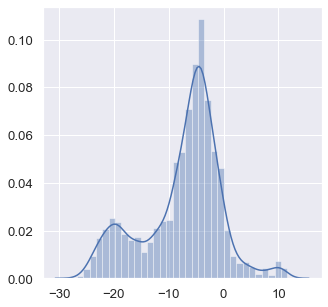

In [130]:
plt.figure(figsize=(5,5))
sns.distplot(model_22.fittedvalues);

In [131]:
y_predict_train = model_22.predict(X_train)



In [132]:
y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [133]:
from sklearn import metrics

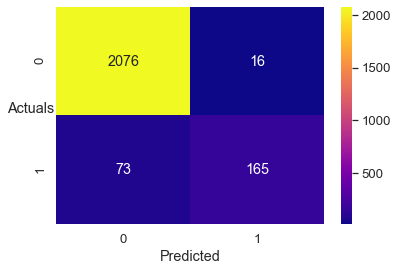

In [134]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [135]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 2076 
False Positives: 16 
False Negatives: 73 
True Positives: 165


In [136]:
print(metrics.classification_report(y_train,y_class_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2092
           1       0.91      0.69      0.79       238

    accuracy                           0.96      2330
   macro avg       0.94      0.84      0.88      2330
weighted avg       0.96      0.96      0.96      2330



In [137]:

#Train Data Accuracy
from sklearn.metrics import accuracy_score 
lr_train_acc= accuracy_score(y_train, y_class_pred)
lr_train_acc

0.9618025751072962

In [138]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

lr_train_precision = precision_score(y_train,y_class_pred)
lr_train_recall = recall_score(y_train,y_class_pred)
lr_train_f1 = f1_score(y_train,y_class_pred)


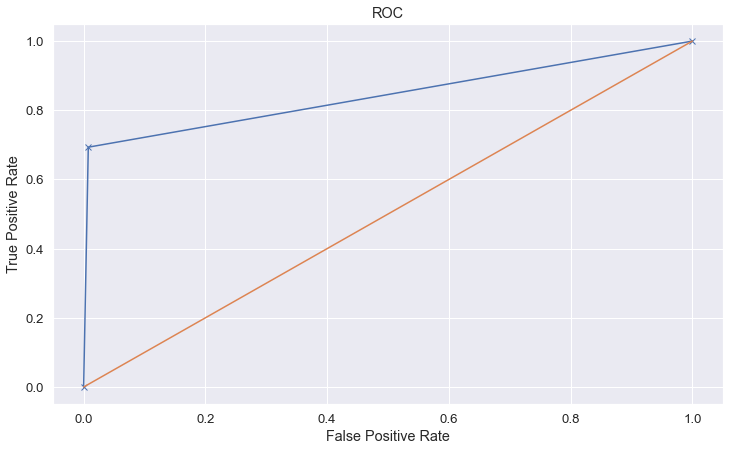

Area under Curve is 0.8428145636839821


In [139]:
from sklearn.metrics import roc_curve,roc_auc_score
lr_train_fpr, lr_train_tpr,_= roc_curve(y_train,y_class_pred)
plt.figure(figsize=(12,7))
plt.plot(lr_train_fpr,lr_train_tpr, marker='x', label='Logistic Regression')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
lr_train_auc = roc_auc_score(y_train,y_class_pred)
print('Area under Curve is', lr_train_auc)

In [140]:
y_predict_test = model_22.predict(X_test)


In [141]:
y_class_pred=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred.append(a)

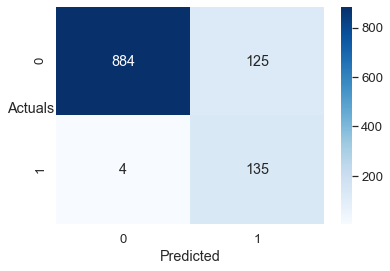

In [142]:

sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [143]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

lr_test_precision = precision_score(y_test,y_class_pred)
lr_test_recall = recall_score(y_test,y_class_pred)
lr_test_f1 = f1_score(y_test,y_class_pred)

In [144]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 884 
False Positives: 125 
False Negatives: 4 
True Positives: 135


In [145]:

print(metrics.classification_report(y_test,y_class_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93      1009
           1       0.52      0.97      0.68       139

    accuracy                           0.89      1148
   macro avg       0.76      0.92      0.80      1148
weighted avg       0.94      0.89      0.90      1148



In [146]:

#Test Data Accuracy
lr_test_acc= accuracy_score(y_test, y_class_pred)
lr_test_acc

0.8876306620209059

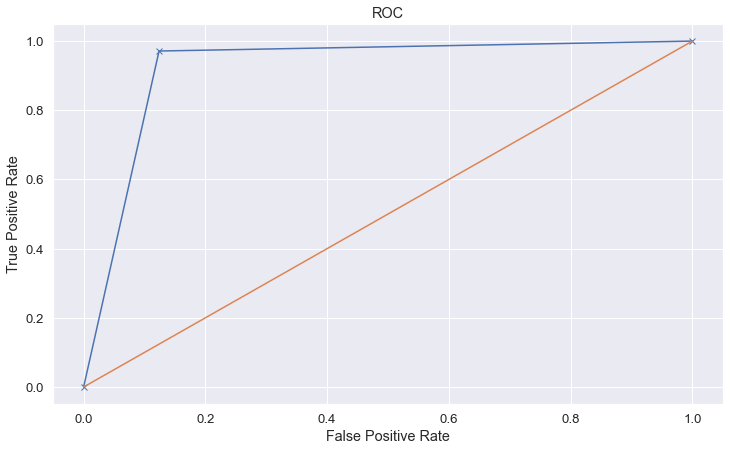

Area under Curve is 0.923668993447462


In [147]:

lr_test_fpr, lr_test_tpr,_= roc_curve(y_test,y_class_pred)
plt.figure(figsize=(12,7))
plt.plot(lr_test_fpr,lr_test_tpr, marker='x', label='Logistic Regression')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
lr_test_auc = roc_auc_score(y_test,y_class_pred)
print('Area under Curve is', lr_test_auc)

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
       'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'n_estimators': [25, 50]

}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [149]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [25, 50]})

In [150]:
best_grid = grid_search.best_estimator_

In [151]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

In [152]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2092
           1       0.96      0.86      0.91       238

    accuracy                           0.98      2330
   macro avg       0.97      0.93      0.95      2330
weighted avg       0.98      0.98      0.98      2330



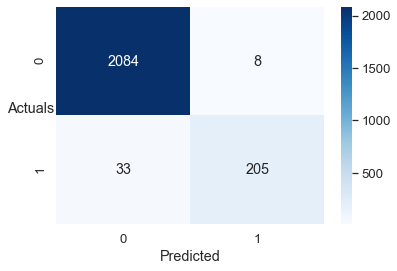

In [153]:

sns.heatmap((metrics.confusion_matrix(y_train,pred_train_rf)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [154]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

rf_train_precision = precision_score(y_train,pred_train_rf)
rf_train_recall = recall_score(y_train,pred_train_rf)
rf_train_f1 = f1_score(y_train,pred_train_rf)


In [155]:

#Train Data Accuracy
from sklearn.metrics import accuracy_score 
rf_train_acc= accuracy_score(y_train, pred_train_rf)
rf_train_acc

0.9824034334763948

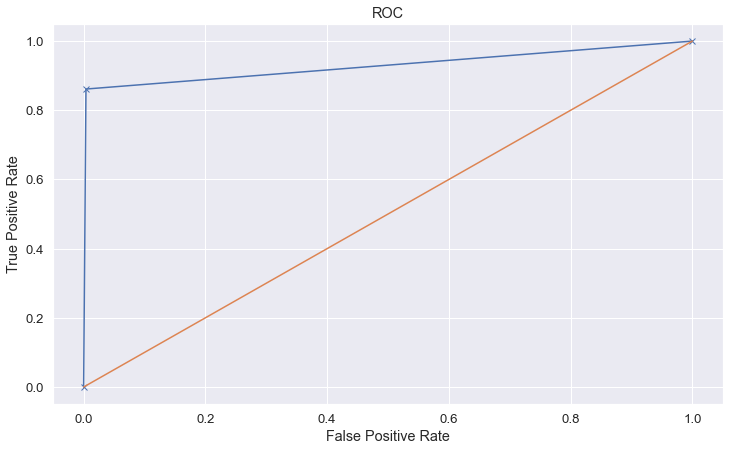

Area under Curve is 0.9287602230184617


In [156]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_train_fpr, rf_train_tpr,_= roc_curve(y_train,pred_train_rf)
plt.figure(figsize=(12,7))
plt.plot(rf_train_fpr,rf_train_tpr, marker='x', label='Random Forest Model')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
rf_train_auc = roc_auc_score(y_train,pred_train_rf)
print('Area under Curve is', rf_train_auc)

In [157]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1009
           1       0.95      0.79      0.86       139

    accuracy                           0.97      1148
   macro avg       0.96      0.89      0.92      1148
weighted avg       0.97      0.97      0.97      1148



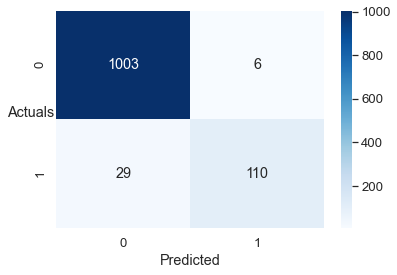

In [158]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_rf)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [159]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

rf_precision = precision_score(y_test, pred_test_rf)
rf_recall = recall_score(y_test, pred_test_rf)
rf_f1 = f1_score(y_test, pred_test_rf)


In [160]:

#Test Data Accuracy
rf_test_acc= accuracy_score(y_test,pred_test_rf)
rf_test_acc

0.9695121951219512

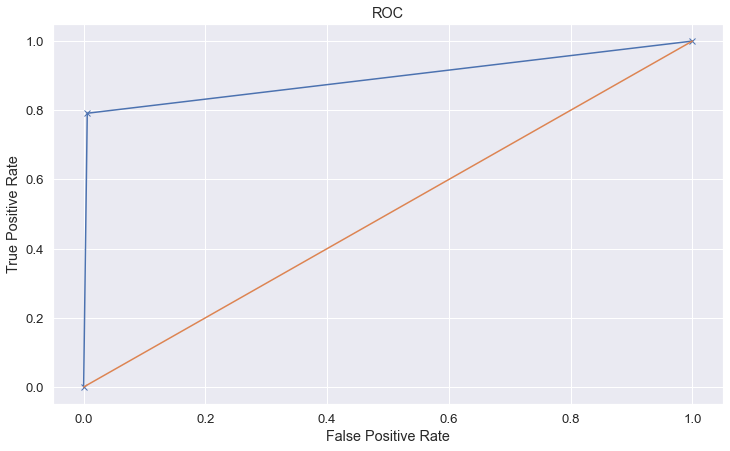

Area under Curve is 0.8927102124049027


In [161]:

rf_test_fpr, rf_test_tpr,_= roc_curve(y_test,pred_test_rf)
plt.figure(figsize=(12,7))
plt.plot(rf_test_fpr,rf_test_tpr, marker='x', label='Logistic Regression')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
rf_test_auc = roc_auc_score(y_test,pred_test_rf)
print('Area under Curve is', rf_test_auc)

In [162]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()

In [163]:
lda_model = LDA.fit(X_train, y_train)

In [164]:
pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)

In [165]:
print(metrics.classification_report(y_train, pred_train_lda))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2092
           1       0.80      0.58      0.67       238

    accuracy                           0.94      2330
   macro avg       0.88      0.78      0.82      2330
weighted avg       0.94      0.94      0.94      2330



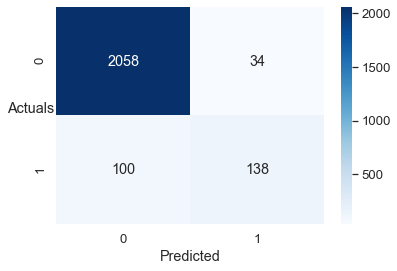

In [166]:

sns.heatmap((metrics.confusion_matrix(y_train,pred_train_lda)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [167]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

lda_train_precision = precision_score(y_train,pred_train_lda)
lda_train_recall = recall_score(y_train,pred_train_lda)
lda_train_f1 = f1_score(y_train,pred_train_lda)


In [168]:
#Train Data Accuracy
from sklearn.metrics import accuracy_score 
lda_train_acc= accuracy_score(y_train, pred_train_lda)
lda_train_acc

0.9424892703862661

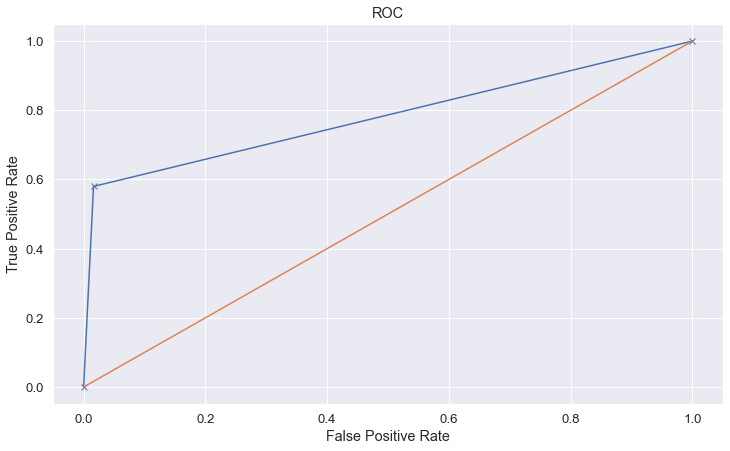

Area under Curve is 0.7817897713578741


In [169]:
from sklearn.metrics import roc_curve,roc_auc_score
lda_train_fpr, lda_train_tpr,_= roc_curve(y_train,pred_train_lda)
plt.figure(figsize=(12,7))
plt.plot(lda_train_fpr,lda_train_tpr, marker='x', label='Random Forest Model')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
lda_train_auc = roc_auc_score(y_train,pred_train_lda)
print('Area under Curve is', lda_train_auc)

In [170]:
print(metrics.classification_report(y_test, pred_test_lda))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1009
           1       0.81      0.50      0.62       139

    accuracy                           0.93      1148
   macro avg       0.87      0.74      0.79      1148
weighted avg       0.92      0.93      0.92      1148



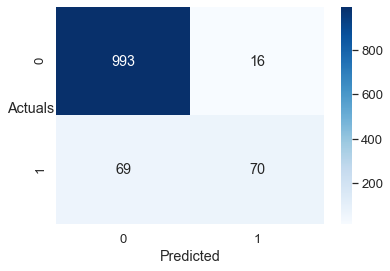

In [171]:
sns.heatmap((metrics.confusion_matrix(y_test, pred_test_lda)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [172]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

lda_precision = precision_score(y_test, pred_test_lda)
lda_recall = recall_score(y_test, pred_test_lda)
lda_f1 = f1_score(y_test, pred_test_lda)
print(lda_precision, lda_recall, lda_f1)

0.813953488372093 0.5035971223021583 0.6222222222222221


In [173]:

#Test Data Accuracy
lda_test_acc= accuracy_score(y_test,pred_test_lda)


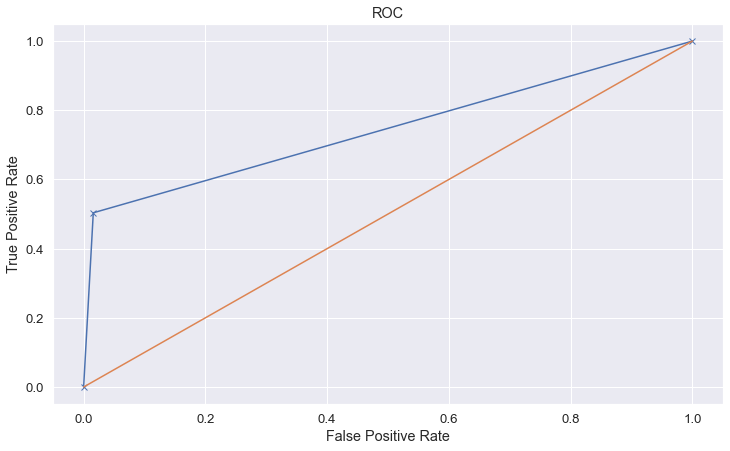

Area under Curve is 0.7438699189310594


In [174]:

lda_test_fpr, lda_test_tpr,_= roc_curve(y_test,pred_test_lda)
plt.figure(figsize=(12,7))
plt.plot(lda_test_fpr,lda_test_tpr, marker='x', label='Logistic Regression')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
lda_test_auc = roc_auc_score(y_test,pred_test_lda)
print('Area under Curve is', lda_test_auc)

In [175]:

index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
       'RF Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'RF Test':[rf_test_acc,rf_test_auc,rf_recall,rf_precision,rf_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_recall,lda_precision,lda_f1]},index=index)
round(data,2)

,LR Train,LR Test,RF Train,RF Test,LDA Train,LDA Test
Accuracy,0.96,0.89,0.98,0.97,0.94,0.93
AUC,0.84,0.92,0.93,0.89,0.78,0.74
Recall,0.69,0.97,0.86,0.79,0.58,0.50
Precision,0.91,0.52,0.96,0.95,0.80,0.81
F1 Score,0.79,0.68,0.91,0.86,0.67,0.62


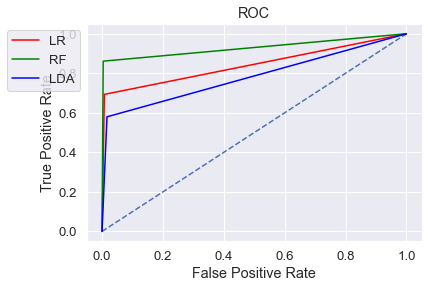

In [176]:

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_train_fpr, lr_train_tpr,color='red',label="LR")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(lda_train_fpr,lda_train_tpr,color='blue',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.), loc='best')

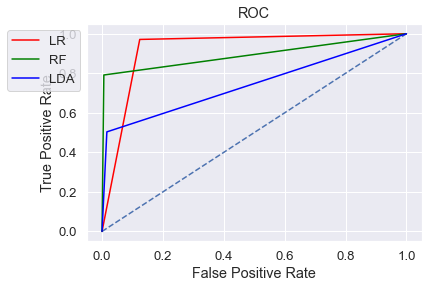

In [177]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_test_fpr, lr_test_tpr,color='red',label="LR")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(lda_test_fpr,lda_test_tpr,color='blue',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.), loc='best')

In [178]:
stock_prices = pd.read_csv('Market+Risk+Dataset.csv')

#Glimpse of Data
stock_prices.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [179]:
stock_prices.columns = stock_prices.columns.str.replace(' ', '_').str.replace('.', '')

In [180]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


In [181]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra_&_Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [182]:
stock_prices.describe()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,511.340764,114.560510,636.678344,540.742038,59.095541,14806.410828,633.468153,147.627389,53.713376,372.659236
std,135.952051,22.509732,102.879975,115.835569,15.810493,4288.275085,171.855893,65.879195,31.248985,202.262668
min,234.000000,64.000000,284.000000,263.000000,21.000000,5543.000000,338.000000,53.000000,3.000000,14.000000
25%,424.000000,96.000000,572.000000,470.500000,47.000000,10952.250000,478.500000,88.250000,25.250000,243.250000
50%,466.500000,115.000000,625.000000,528.000000,57.000000,16018.500000,614.000000,142.500000,53.000000,376.000000
75%,630.750000,134.000000,678.000000,605.250000,71.750000,17773.250000,785.000000,182.750000,82.000000,534.000000
max,810.000000,157.000000,956.000000,808.000000,104.000000,24806.000000,1089.000000,338.000000,117.000000,871.000000


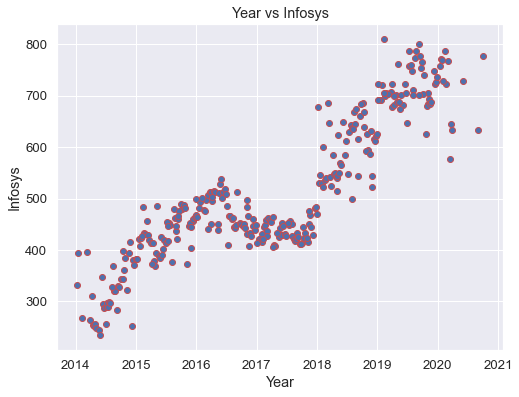

In [183]:
plt.figure(figsize = (8, 6))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Infosys'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Infosys')
plt.title('Year vs Infosys')

plt.show()

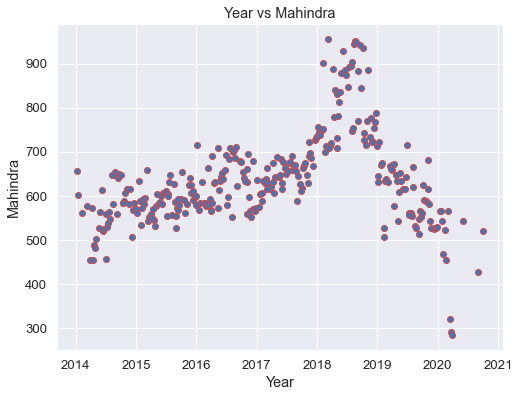

In [184]:
plt.figure(figsize = (8, 6))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Mahindra_&_Mahindra'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Mahindra')
plt.title('Year vs Mahindra')

plt.show()

In [185]:
stock_returns = np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1) 

In [186]:
stock_returns.shape

(314, 10)

In [187]:
stock_returns.head()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


In [189]:
stock_means = stock_returns.mean(axis = 0)
stock_means.sort_values(ascending=False)

Shree_Cement           0.003681
Infosys                0.002794
Axis_Bank              0.001167
Indian_Hotel           0.000266
Sun_Pharma            -0.001455
Mahindra_&_Mahindra   -0.001506
SAIL                  -0.003463
Jindal_Steel          -0.004123
Jet_Airways           -0.009548
Idea_Vodafone         -0.010608
dtype: float64

In [191]:
stock_sd = stock_returns.std(axis = 0)
stock_sd.sort_values(ascending=False)

Idea_Vodafone          0.104315
Jet_Airways            0.097972
Jindal_Steel           0.075108
SAIL                   0.062188
Indian_Hotel           0.047131
Axis_Bank              0.045828
Sun_Pharma             0.045033
Mahindra_&_Mahindra    0.040169
Shree_Cement           0.039917
Infosys                0.035070
dtype: float64

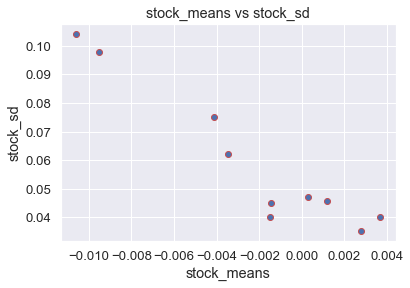

In [192]:

plt.scatter(stock_means, stock_sd, edgecolors='r')
plt.xlabel('stock_means')
plt.ylabel('stock_sd')
plt.title('stock_means vs stock_sd')
plt.show()